# FLuShot Learning
# Predicción de Vacunación contra la Gripe

## Introducción
En este proyecto, buscamos predecir si una persona se vacunará contra la gripe H1N1 y la gripe estacional basándonos en datos demográficos y de comportamiento. Esta predicción es crucial para identificar grupos de alto riesgo y dirigir las campañas de vacunación de manera más efectiva.

El análisis se basa en el conjunto de datos "Flu Shot Learning" que contiene información sobre varias características relevantes, incluyendo la preocupación por el H1N1, el conocimiento sobre la gripe, y el acceso a servicios médicos.

## Objetivos
1. Analizar los factores que influyen en la vacunación contra el H1N1 y la gripe estacional.
2. Desarrollar modelos predictivos para ambas vacunas.
3. Evaluar el rendimiento de los modelos y proponer mejoras.


Datos obtenidos del sitio web de Driven Data.

https://www.drivendata.org/competitions/66/flu-shot-learning/data/

**Autor**: Diego Pastor Bonet

**Datos del modelo final elegido**
* Score test (DrivenData): 0.7860
* Algoritmo ML: Regresión Lineal, RandomSearch
* Hiperparámetros:
  * ridge alpha = 0.1
  * ridge fit intercept = True

Lista de características:

* income_poverty_num             
* education_num                  
* employment_status_num          
* h1n1_knowledge                 
* household_adults               
* children_per_adult             
* household_size                 
* health_worker                  
* sex_bin                                       
* census_msa_num                 
* opinion_h1n1_vacc_effective                      
* household_children             
* opinion_seas_vacc_effective    
* behavioral_avoidance           
* doctor_recc_h1n1               
* behavioral_wash_hands          
* doctor_recc_seasonal          
* respondent_id                 
* child_under_6_months          
* opinion_seas_risk             
* opinion_h1n1_risk             
* hhs_geo_region_num            
* age_group_num                 
* behavioral_touch_face         
* h1n1_concern                  
* behavioral_face_mask          
* behavioral_antiviral_meds     
* opinion_h1n1_sick_from_vacc   
* chronic_med_condition         
* opinion_seas_sick_from_vacc   
* precaution_level              
* race_num                      
* behavioral_large_gatherings   
* behavioral_outside_home       
* employment_occupation_num     
* employment_industry_num      
* rent_or_own_bin               
* marital_status_bin   



 Resumen dataset (transformaciones, etc.):
  * Binarización de las variables 'sex', 'marital_status' y 'rent_or_own' dando lugar a 'sex_bin', 'marital_status_bin' y 'rent_or_own_bin'.
  * Transformación a escala numérica las variables income_poverty_num,        education_num, employment_status_num, employment_industry_num, census_msa_num, employment_occupation_num, hhs_geo_region_num y age_group_num.
  * Tratamiento de nulos con el método ffill, excepto en el caso de las variables 'income_poverty_num', 'doctor_recc_h1n1' y 'doctor_recc_seasonal' en las que se han hecho interpolaciones.
  * Creación de las variables 'precaution_level' y 'household_size'
  * Eliminación de la variable 'health_insurance'.

---
# Resumen
---


A lo largo de este análisis se elaborará un modelo de predicción que podrá ser puesto a prueba en la web de DrivenData.

En primer lugar se hará un procesado teniendo en cuenta las necesidades estructurales de la competición.

Se probarán algoritmos de agrupamiento para generar etiquetas adicionales en el dataset, se probarán también varios modelos de predicción para encontrar el mejor posible. Finalmente, todo esto será puesto a prueba mediante un conjunto de validación y adicionalmente por la web mediante un conjunto de test. La métrica que se utilizará para evaluar los modelos será el Score ([0, 1]) aportado por DrivenData.

El objetivo será alcanzar el mayor valor de Score entregando diferentes intentos con combinaciones de grupos de características y algoritmos a esta web.

En base a esta métrica, el conjunto de datos mejor valorado ha sido el conformado por el conjunto de datos original, al que se le ha sin etiquetas adicionales generadas por algoritmos de agrupamiento, al que se han añadido unas nuevas características en base a las previas. Otras han sido eliminadas por diferentes motivos como excesiva proporción de nulos. El modelo de predicción que mejor ha funcionado es el de Regresión Lineal optimizado mediante Random Search.

Otras combinaciones como una sub-selección de características, diferentes modelos de predicción o diferentes algoritmos de agrupamiento han dado todos peores resultados que éste, sin embargo, aún hay espacio para seguir investigando, especialmente con diferentes conjuntos de características.

---
# Inicialización
---

En esta sección se ejecuta código indispensable para la práctica.

Se trata de imports de librerías necesarias, creación de funciones y subidas de los archivos de entrenamiento y test.

*Es importante ejecutar las celdas de código en orden, no hacerlo puede provocar que algunas partes no funcionen correctamente.

In [1]:
# Imports generales
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import io

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df

In [2]:
# Subir el conjunto de entrenamiento sin variable objetivo (training_set_features.csv)
train_feat = upload_files()
print(train_feat.shape)
train_feat.head()

Saving training_set_features.csv to training_set_features.csv
User uploaded file "training_set_features.csv" with length 4619138 bytes
(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# Subir la variable objetivo del conjunto de entrenamiento (training_set_labels.csv)
train_labels = upload_files()
print(train_labels.shape)
train_labels.head()

Saving training_set_labels.csv to training_set_labels.csv
User uploaded file "training_set_labels.csv" with length 256004 bytes
(26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
# Unificar el conjunto de entrenamiento (características + variable objetivo)
train = pd.merge(train_feat,train_labels,on=['respondent_id'])
print(train.shape)
train.head()

(26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
#Comprobamos las características de los datos de entrenamiento y sus tipos

print(train.dtypes)

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

Algunas características de tipo texto pueden ser convertidas a números para ser aprovechadas en algoritmos de agrupamiento, y para poder ser normalizadas con el resto de caarcterísticas.

In [6]:
# Subir el conjunto de test sin variable objetivo (test_set_features.csv)
test = upload_files()
print(test.shape)
test.head()

Saving test_set_features.csv to test_set_features.csv
User uploaded file "test_set_features.csv" with length 4633317 bytes
(26708, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


---
# Preprocessing
---

En primer lugar se crea la variable household size para tener el total de miembros de la familia. También se crea el ratio entre niños y adultos children per adult y el nivel de precaución general que tienen los individuos a partir de varios de sus comportamientos particulares.

Posteriormente se convierte a variables numéricas las variables categóricas para poder ser utilizadas con algoritmos que así lo requieren.

In [7]:
#Ingeniería de características

#Creación de variables nuevas a partir de las existentes

#Household size
train['household_size'] = train['household_adults'] + train['household_children']
test['household_size'] = test['household_adults'] + test['household_children']

#General precaution level
train['precaution_level'] = (train['behavioral_wash_hands'] + train['behavioral_face_mask'] +
                             train['behavioral_avoidance'] + train['behavioral_antiviral_meds'] +
                             train['behavioral_large_gatherings'] + train['behavioral_outside_home'] +
                             train['behavioral_touch_face'])
test['precaution_level'] = (test['behavioral_wash_hands'] + test['behavioral_face_mask'] +
                             test['behavioral_avoidance'] + test['behavioral_antiviral_meds'] +
                             test['behavioral_large_gatherings'] + test['behavioral_outside_home'] +
                             test['behavioral_touch_face'])


# Children per adult ratio
train['children_per_adult'] = train['household_children'] / train['household_adults']
test['children_per_adult'] = test['household_children'] / test['household_adults']

# Reemplazar los valores infinitos y NaN por 0
train['children_per_adult'].replace([float('inf'), -float('inf')], 0, inplace=True)
train['children_per_adult'].fillna(0, inplace=True)

test['children_per_adult'].replace([float('inf'), -float('inf')], 0, inplace=True)
test['children_per_adult'].fillna(0, inplace=True)

# Verifica el resultado
print(train[['household_size', 'precaution_level', 'children_per_adult']].head())

   household_size  precaution_level  children_per_adult
0             0.0               2.0                 0.0
1             0.0               4.0                 0.0
2             2.0               1.0                 0.0
3             0.0               3.0                 0.0
4             1.0               4.0                 0.0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()

# Binarizar 'sex'
train['sex_bin'] = le.fit_transform(train['sex'])
test['sex_bin'] = le.fit_transform(test['sex'])
# Mapear el resultado de 'sex_bin' a valores binarios explícitos (1 para 'male', 0 para 'female')
train['sex_bin'] = train['sex_bin'].map({1: 1, 0: 0})  # Suponiendo que 'male' se codifica como 1 y 'female' como 0
test['sex_bin'] = test['sex_bin'].map({1: 1, 0: 0})

# Binarizar 'marital_status'
train['marital_status_bin'] = le.fit_transform(train['marital_status'])
test['marital_status_bin'] = le.fit_transform(test['marital_status'])
# Mapear el resultado de 'marital_status_bin' a valores binarios explícitos (1 para 'Married', 0 para 'Not Married')
train['marital_status_bin'] = train['marital_status_bin'].map({1: 1, 0: 0})  # Suponiendo que 'Married' se codifica como 1
test['marital_status_bin'] = test['marital_status_bin'].map({1: 1, 0: 0})

# Binarizar 'rent_or_own'
train['rent_or_own_bin'] = le.fit_transform(train['rent_or_own'])
test['rent_or_own_bin'] = le.fit_transform(test['rent_or_own'])
# Mapear el resultado de 'rent_or_own_bin' a valores binarios explícitos (1 para 'Own', 0 para 'Rent')
train['rent_or_own_bin'] = train['rent_or_own_bin'].map({1: 1, 0: 0})  # Suponiendo que 'Own' se codifica como 1
test['rent_or_own_bin'] = test['rent_or_own_bin'].map({1: 1, 0: 0})

# Eliminar las columnas originales
train.drop(columns=['sex', 'marital_status', 'rent_or_own'], inplace=True)
test.drop(columns=['sex', 'marital_status', 'rent_or_own'], inplace=True)

# Verifica el resultado
print(train[['sex_bin', 'marital_status_bin', 'rent_or_own_bin']].head())
print(test[['sex_bin', 'marital_status_bin', 'rent_or_own_bin']].head())

   sex_bin  marital_status_bin  rent_or_own_bin
0        0                 1.0              0.0
1        1                 1.0              1.0
2        1                 1.0              0.0
3        0                 1.0              1.0
4        0                 0.0              0.0
   sex_bin  marital_status_bin  rent_or_own_bin
0        0                 1.0              1.0
1        1                 1.0              1.0
2        1                 0.0              0.0
3        0                 0.0              0.0
4        0                 1.0              0.0


Para tratar las siguientes características se mapearán de forma lógica las diferentes categorías (p.e. de forma creciente de grupo de edad en la variable age_group).

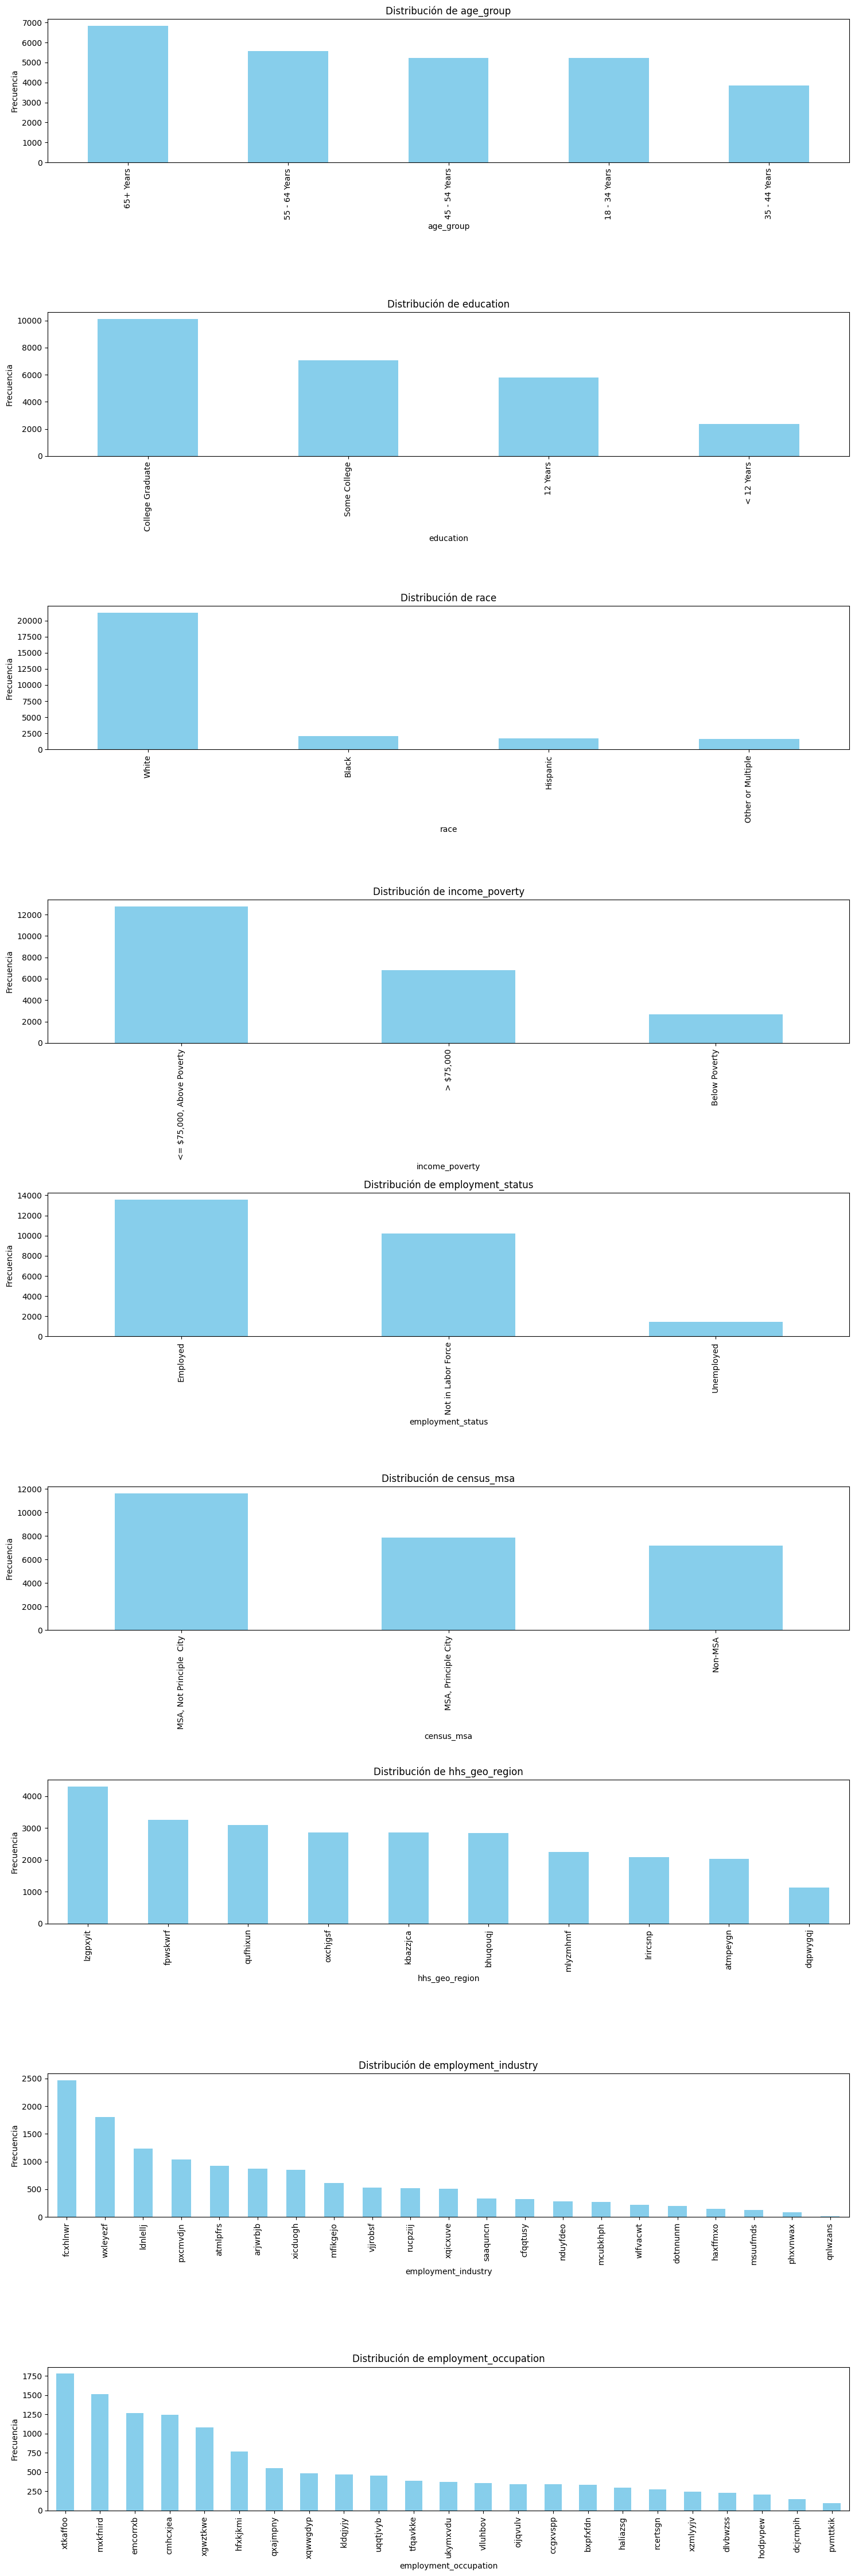

In [9]:
# Lista de columnas categóricas
categorical_columns = ['age_group', 'education', 'race', 'income_poverty',
                       'employment_status', 'census_msa', 'hhs_geo_region',
                       'employment_industry', 'employment_occupation']

# Configuración de los gráficos para que se muestren de forma adecuada
plt.figure(figsize=(15, len(categorical_columns) * 5))

# Crear un gráfico de barras para cada columna categórica
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    train[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [10]:
# Crear mapeos personalizados para las columnas que requieren un orden específico

# age_group_num
age_group_mapping = {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
}
train['age_group_num'] = train['age_group'].map(age_group_mapping)
test['age_group_num'] = test['age_group'].map(age_group_mapping)

# education_num
education_mapping = {
    '< 12 Years': 0,
    '12 Years': 1,
    'Some College': 2,
    'College Graduate': 3
}
train['education_num'] = train['education'].map(education_mapping)
test['education_num'] = test['education'].map(education_mapping)

# race_num
race_mapping = {
    'White': 0,
    'Black': 1,
    'Hispanic': 2,
    'Other or Multiple': 3
}
train['race_num'] = train['race'].map(race_mapping)
test['race_num'] = test['race'].map(race_mapping)

# income_poverty_num
income_poverty_mapping = {
    'Below Poverty': 0,
    '<= $75,000, Above Poverty': 1,
    '> $75,000': 2
}
train['income_poverty_num'] = train['income_poverty'].map(income_poverty_mapping)
test['income_poverty_num'] = test['income_poverty'].map(income_poverty_mapping)

# employment_status_num
employment_status_mapping = {
    'Unemployed': 0,
    'Not in Labor Force': 1,
    'Employed': 2
}
train['employment_status_num'] = train['employment_status'].map(employment_status_mapping)
test['employment_status_num'] = test['employment_status'].map(employment_status_mapping)

# census_msa_num
census_msa_mapping = {
    'Non-MSA': 0,
    'MSA, Not Principle  City': 1,
    'MSA, Principle City': 2
}
train['census_msa_num'] = train['census_msa'].map(census_msa_mapping)
test['census_msa_num'] = test['census_msa'].map(census_msa_mapping)

# Para las columnas que no requieren un orden específico, utilizamos LabelEncoder
le = LabelEncoder()

# hhs_geo_region_num
train['hhs_geo_region_num'] = le.fit_transform(train['hhs_geo_region'])
test['hhs_geo_region_num'] = le.fit_transform(test['hhs_geo_region'])

# employment_industry_num
train['employment_industry_num'] = le.fit_transform(train['employment_industry'])
test['employment_industry_num'] = le.fit_transform(test['employment_industry'])

# employment_occupation_num
train['employment_occupation_num'] = le.fit_transform(train['employment_occupation'])
test['employment_occupation_num'] = le.fit_transform(test['employment_occupation'])

# Eliminar las columnas originales
train.drop(columns=['age_group', 'education', 'race', 'income_poverty',
                    'employment_status', 'census_msa', 'hhs_geo_region',
                    'employment_industry', 'employment_occupation'], inplace=True)
test.drop(columns=['age_group', 'education', 'race', 'income_poverty',
                   'employment_status', 'census_msa', 'hhs_geo_region',
                   'employment_industry', 'employment_occupation'], inplace=True)

# Verifica el resultado
print(train.head())

   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

---
# Procesado
---

En esta sección se ejecutará código de procesado de características.

Se trata de eliminación de variables y tratamiento de nulos.

No se eliminan en el conjunto de test registros con demasiados nulos o tratamiento de outliers en general, esto es porque al final de la actividad, al subir el archivo a la plataforma del concurso, el archivo debe tener el número de registros original.

En primer lugar vamos a visualizar la matriz de correlación de las características.

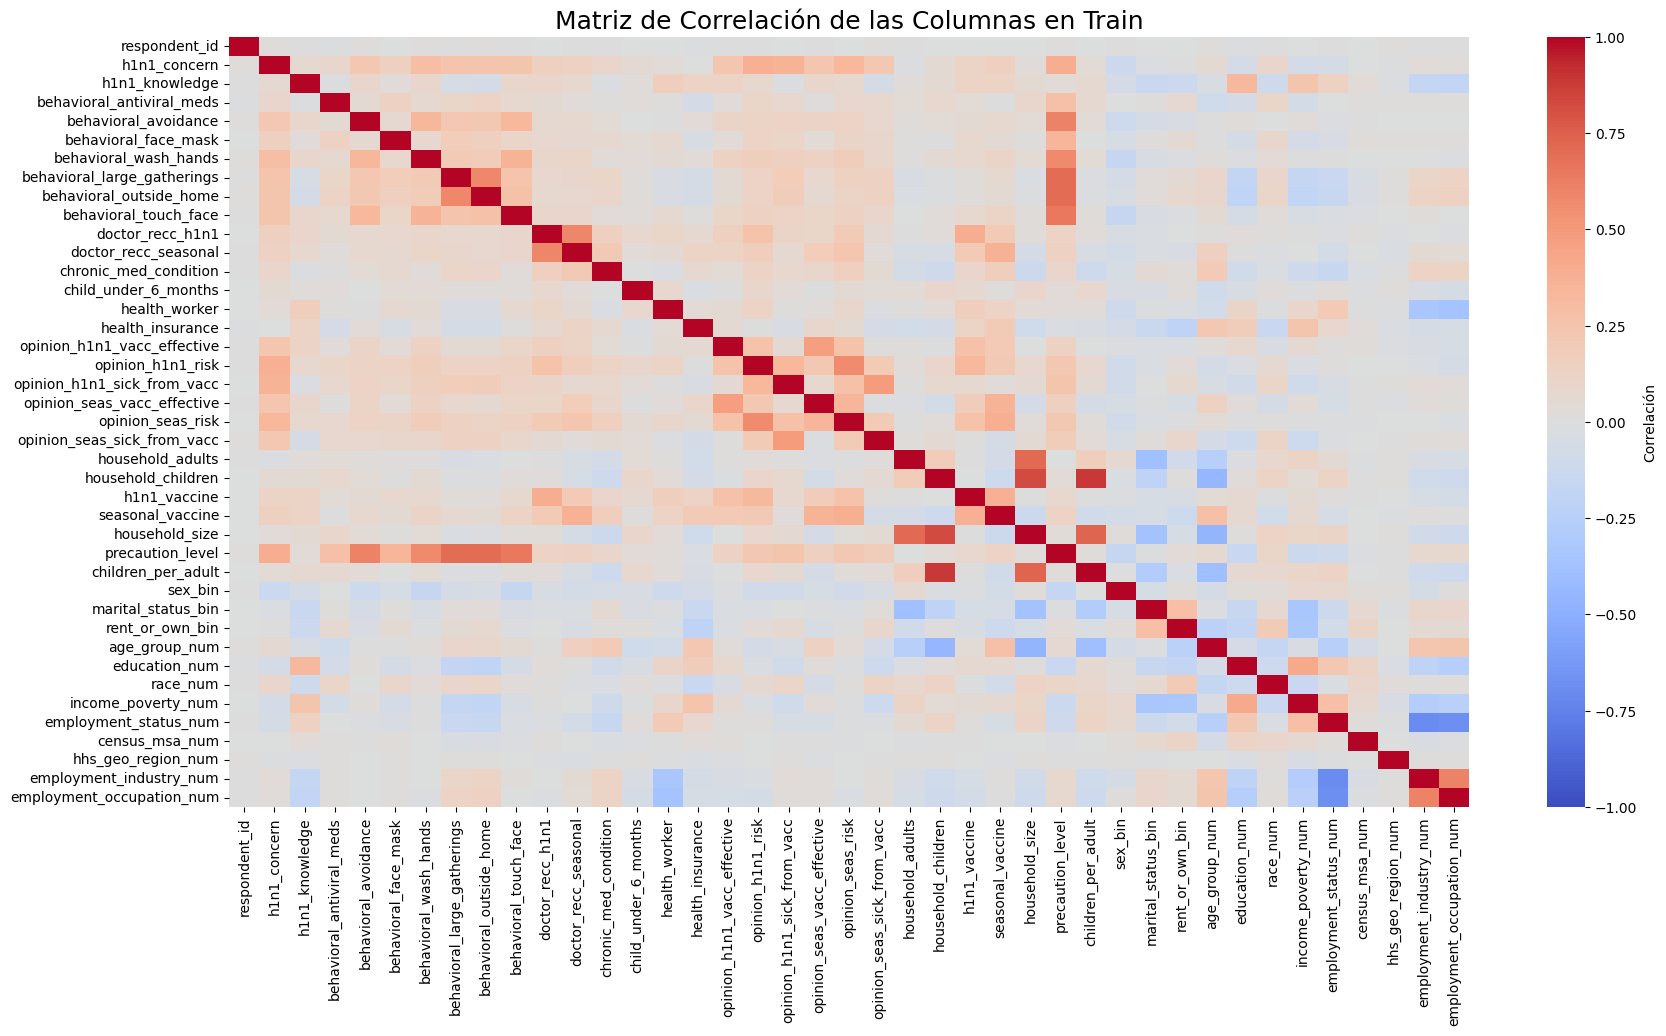

In [11]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = train.corr()

# Crear un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(20, 10))  # Ajuste del ancho y altura del gráfico
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación de las Columnas en Train', fontsize=18)
plt.show()

Se observa que no hay una gran correlación entre las variables objetivo y otras características a priori (salvo entre sí las dos variables objetivo), por lo que no hay ninguna variable privilegiada que explique de forma sencilla los resultados.

##Tratamiento de nulos

En primer lugar vamos a visualizar los nulos del conjunto de entrenamiento.

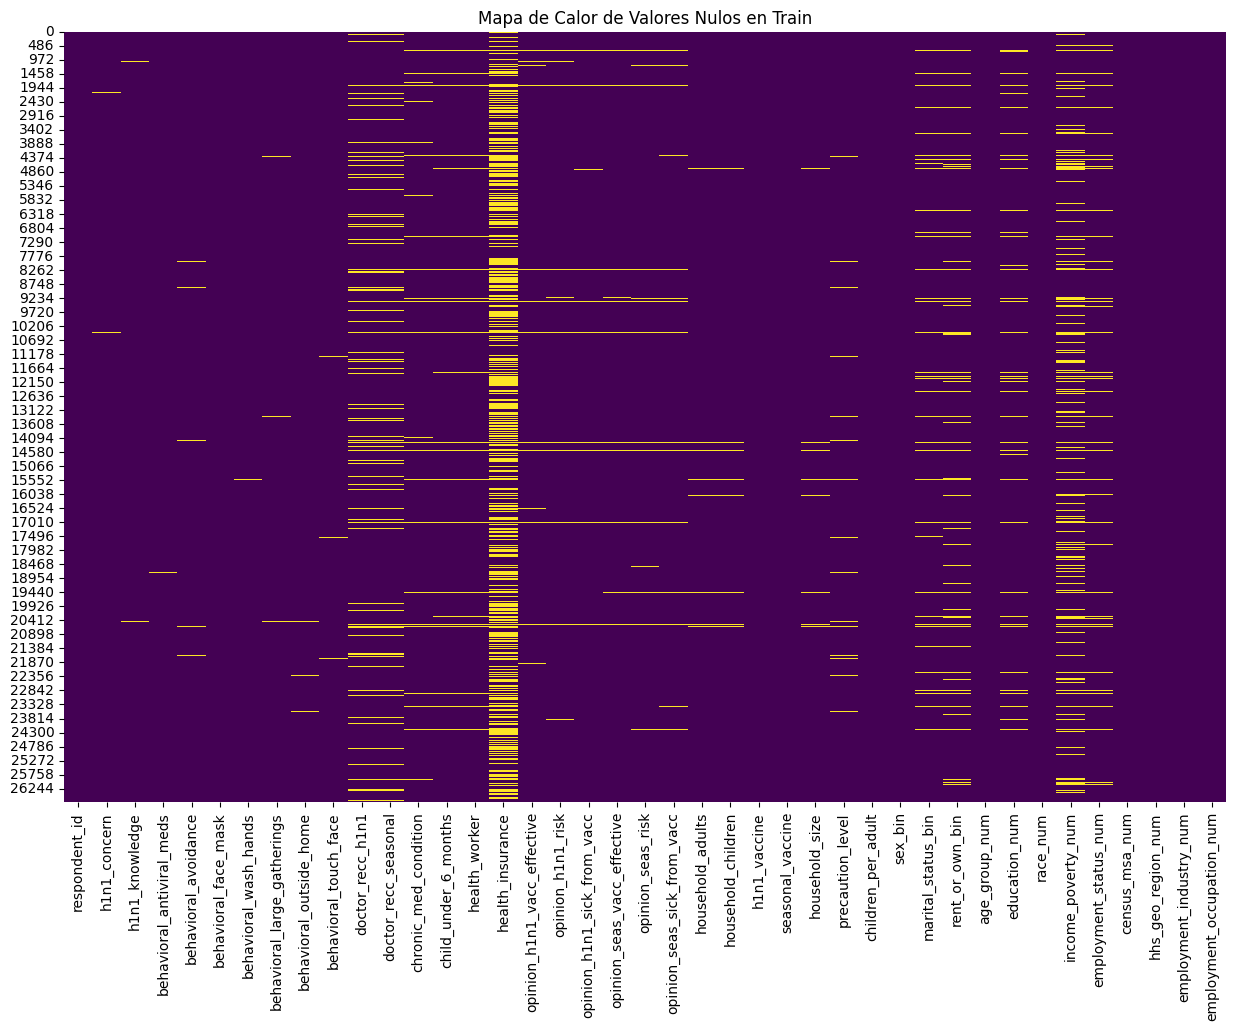

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de valores nulos
plt.figure(figsize=(15, 10))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en Train')
plt.show()

In [13]:
# Calcular el porcentaje de valores nulos para cada columna
porcentaje_nulos = train.isnull().mean() * 100

# Crear un DataFrame con el nombre de la columna y el porcentaje de nulos
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje de Nulos (%)']

# Mostrar el resultado
print(porcentaje_nulos_df)


                        Columna  Porcentaje de Nulos (%)
0                 respondent_id                 0.000000
1                  h1n1_concern                 0.344479
2                h1n1_knowledge                 0.434343
3     behavioral_antiviral_meds                 0.265848
4          behavioral_avoidance                 0.778822
5          behavioral_face_mask                 0.071142
6         behavioral_wash_hands                 0.157262
7   behavioral_large_gatherings                 0.325757
8       behavioral_outside_home                 0.307036
9         behavioral_touch_face                 0.479275
10             doctor_recc_h1n1                 8.087767
11         doctor_recc_seasonal                 8.087767
12        chronic_med_condition                 3.635751
13         child_under_6_months                 3.070356
14                health_worker                 3.010447
15             health_insurance                45.957989
16  opinion_h1n1_vacc_effective

Observamos que la variable health_insurance tiene la friolera de 46% de nulos, por lo que decidimos no contar con esta característica.

In [14]:
train.drop(columns=['health_insurance'], inplace=True)
test.drop(columns=['health_insurance'], inplace=True)

Para tratar los nulos de la variable income_poverty_num vamos a hacer una interpolación lineal múltiple con las características con las que más está relacionada.

In [15]:
# Calcular la correlación de income_poverty_num con el resto de las columnas
correlation_with_poverty = train.corr()['income_poverty_num'].sort_values(ascending=False)

# Mostrar la correlación de poverty con el resto de las características
print(correlation_with_poverty)

income_poverty_num             1.000000
education_num                  0.421575
employment_status_num          0.287144
h1n1_knowledge                 0.245977
household_adults               0.118986
children_per_adult             0.106746
household_size                 0.102022
health_worker                  0.093712
sex_bin                        0.079504
seasonal_vaccine               0.068295
census_msa_num                 0.066398
opinion_h1n1_vacc_effective    0.060554
h1n1_vaccine                   0.054557
household_children             0.046265
opinion_seas_vacc_effective    0.033123
behavioral_avoidance           0.028255
doctor_recc_h1n1               0.007641
behavioral_wash_hands          0.006874
doctor_recc_seasonal          -0.002075
respondent_id                 -0.005695
child_under_6_months          -0.013745
opinion_seas_risk             -0.014894
opinion_h1n1_risk             -0.027177
hhs_geo_region_num            -0.035600
age_group_num                 -0.035964


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Seleccionar características relevantes para la predicción
features = ['education_num', 'employment_status_num', 'marital_status_bin', 'rent_or_own_bin']  # Puedes añadir más si tiene sentido

# Separar los datos en los que income_poverty_num no es nulo y los que son nulos
data_completa = train.dropna(subset=['income_poverty_num'])
data_nula = train[train['income_poverty_num'].isnull()]

# Definir X (características) e y (target) para la regresión
X_train = data_completa[features]
y_train = data_completa['income_poverty_num']

# Imputar los valores nulos en las características usando la media
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Entrenar el modelo de Ridge Regression con validación cruzada
modelo = Ridge(alpha=1.0)
scores = cross_val_score(modelo, X_train_imputed, y_train, cv=5)

# Entrenar el modelo en todo el conjunto de datos sin nulos
modelo.fit(X_train_imputed, y_train)

# Imputar los valores nulos en X_pred
X_pred = imputer.transform(data_nula[features])

# Predecir los valores nulos en income_poverty_num
predicciones = modelo.predict(X_pred)

# Redondear las predicciones al entero más cercano
predicciones_rounded = np.round(predicciones).astype(int)

# Reemplazar los valores nulos en el DataFrame original
train.loc[train['income_poverty_num'].isnull(), 'income_poverty_num'] = predicciones_rounded

In [17]:
# Repetimos con test
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
import numpy as np

# Imputar los valores nulos en las características de 'test' usando la media de 'train'
X_test = test[features]
X_test_imputed = imputer.transform(X_test)  # Utilizamos el mismo imputer ya ajustado con 'train'

# Predecir los valores nulos en 'income_poverty_num' en 'test' utilizando el modelo entrenado
predicciones_test = modelo.predict(X_test_imputed)

# Redondear las predicciones al entero más cercano
predicciones_rounded_test = np.round(predicciones_test).astype(int)

# Añadir las predicciones como una nueva columna 'income_poverty_num' en 'test'
test['income_poverty_num'] = predicciones_rounded_test

In [18]:
# Contar el número de registros totales
total_registros = train.shape[0]

# Contar el número de registros sin valores nulos
sin_nulos = train.dropna().shape[0]

# Contar el número de registros con al menos un valor nulo
con_nulos = total_registros - sin_nulos

# Calcular el porcentaje de registros con valores nulos
porcentaje_con_nulos = (con_nulos / total_registros) * 100

# Mostrar los resultados
print(f"Total de registros: {total_registros}")
print(f"Registros sin nulos: {sin_nulos}")
print(f"Registros con al menos un nulo: {con_nulos}")
print(f"Porcentaje de registros con nulos: {porcentaje_con_nulos:.2f}%")

Total de registros: 26707
Registros sin nulos: 21710
Registros con al menos un nulo: 4997
Porcentaje de registros con nulos: 18.71%


A continuación comprobamos los registros de entrenamiento que contengan una gran cantidad de nulos, a prtir de 3 caracteristicas.

In [19]:
# Contar el número de valores nulos en cada fila
nulos_por_fila = train.isnull().sum(axis=1)

# Contar cuántos registros tienen al menos 3 valores nulos
registros_con_3_o_mas_nulos = (nulos_por_fila >= 3).sum()

# Calcular el porcentaje que representa del total
porcentaje_con_3_o_mas_nulos = (registros_con_3_o_mas_nulos / train.shape[0]) * 100

# Mostrar los resultados
print(f"Registros con al menos 3 nulos: {registros_con_3_o_mas_nulos}")
print(f"Porcentaje del total: {porcentaje_con_3_o_mas_nulos:.2f}%")

Registros con al menos 3 nulos: 1649
Porcentaje del total: 6.17%


Al ser sólo el 6.17% de los registros, prescindimos de ellos.

In [20]:
# Contar el número de valores nulos en cada fila
nulos_por_fila = train.isnull().sum(axis=1)

# Filtrar los registros que tienen menos de 3 valores nulos
train = train[nulos_por_fila < 3]

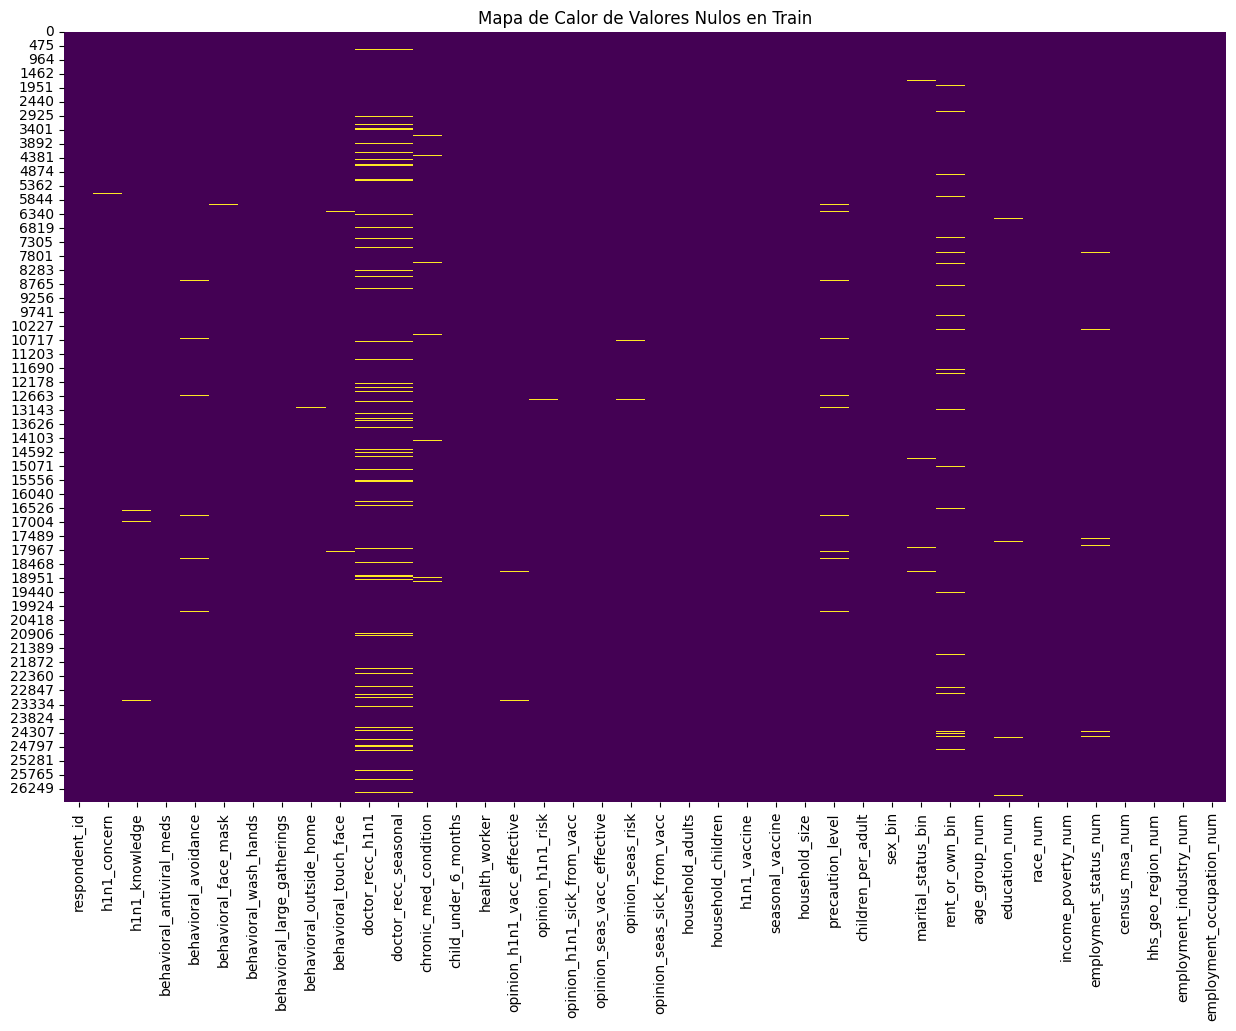

In [21]:
# Crear un mapa de calor de valores nulos
plt.figure(figsize=(15, 10))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en Train')
plt.show()

Destacan las variables doctor_recc_h1n1 y doctor_recc_seasonal, en este caso haremos una imputación de sus valores a partir de un clasificador (Random Forest) tomando las variables 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
            'chronic_med_condition', 'health_worker', 'age_group_num' y 'education_num'

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Definir las características que se utilizarán para predecir 'doctor_recc_h1n1'
features = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
            'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
            'chronic_med_condition', 'health_worker', 'age_group_num', 'education_num']

# Proceso  para 'train'
# ---------------------------------
# Filtrar los datos completos (sin nulos en doctor_recc_h1n1) y los datos con nulos
data_completa = train.dropna(subset=['doctor_recc_h1n1'])
data_nula = train[train['doctor_recc_h1n1'].isnull()]

# Definir X e y para los datos completos
X_train = data_completa[features]
y_train = data_completa['doctor_recc_h1n1']

# Para el conjunto de predicción (donde doctor_recc_h1n1 es nulo)
X_pred_train = data_nula[features]

# Imputar posibles valores nulos en X_train y X_pred (en caso de que haya nulos en las características)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_pred_train_imputed = imputer.transform(X_pred_train)

# Entrenar un modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_imputed, y_train)

# Predecir los valores de doctor_recc_h1n1 en los registros con nulos en 'train'
predicciones_train = modelo.predict(X_pred_train_imputed)

# Reemplazar los valores nulos en el DataFrame original 'train'
train.loc[train['doctor_recc_h1n1'].isnull(), 'doctor_recc_h1n1'] = predicciones_train

# Aplicar el mismo proceso al conjunto de datos 'test'
# -----------------------------------------------------

# Imputar posibles valores nulos en las características de 'test'
X_test = test[features]
X_test_imputed = imputer.transform(X_test)  # Utiliza el mismo imputer ya ajustado con 'train'

# Predecir los valores de 'doctor_recc_h1n1' en 'test' utilizando el modelo entrenado
predicciones_test = modelo.predict(X_test_imputed)

# Añadir las predicciones como una nueva columna 'doctor_recc_h1n1' en 'test'
test['doctor_recc_h1n1'] = predicciones_test

In [23]:
# Contar el número de registros totales
total_registros = train.shape[0]

# Contar el número de registros sin valores nulos
sin_nulos = train.dropna().shape[0]

# Contar el número de registros con al menos un valor nulo
con_nulos = total_registros - sin_nulos

# Calcular el porcentaje de registros con valores nulos
porcentaje_con_nulos = (con_nulos / total_registros) * 100

# Mostrar los resultados
print(f"Total de registros: {total_registros}")
print(f"Registros sin nulos: {sin_nulos}")
print(f"Registros con al menos un nulo: {con_nulos}")
print(f"Porcentaje de registros con nulos: {porcentaje_con_nulos:.2f}%")

Total de registros: 25058
Registros sin nulos: 21710
Registros con al menos un nulo: 3348
Porcentaje de registros con nulos: 13.36%


Para el resto de nulos, emplearmos el método forward fill:

In [24]:
# Rellenar los valores nulos restantes utilizando ffill
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

<ipython-input-24-85796eeacc4c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='ffill', inplace=True)
<ipython-input-24-85796eeacc4c>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill', inplace=True)


#Separación del conjunto de validación

Adicionalmente, se separa del conjunto de entrenamiento un pequeño conjunto de validación que se empleará para tener un Score alternativo al obtenido de la página web. Los algoritmos de entrenamiento no verán este conjunto de validación.

Esto es útil puesto que contamos con datos etiquetados, a los que podemos quitar la etiqueta durante la validación y posteriormente comprobar los resultados con la misma.

Se realiza esta separación en este momento puesto que ya está tratado el conjunto de entrenamiento, por lo tanto no es necesario volver a aplicar las transformaciones al de validación.

In [25]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(train, test_size=0.2, random_state=123)

In [26]:
print('Conjunto de test: ' + str(test.shape))
print('Conjunto de entrenamiento: ' + str(train.shape))
print('Conjunto de validación: ' + str(validation.shape))

Conjunto de test: (26708, 38)
Conjunto de entrenamiento: (20046, 40)
Conjunto de validación: (5012, 40)


##Normalización de las variables

Previo al análisis de agrupamiento con diferentes algoritmos es necesario normalizar los valores de los atributos del set de entrenamiento.

Esto se debe a que este tipo de algoritmos tiende a valorar más la aportación de una variable con un valor muy elevado por encima de otra variable que tomas valores pequeños.

Para evitar este sesgo, se reescalan todos los valores del dataset:

In [27]:
#Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
original_train=train

train = train.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
train = scaler.fit_transform(train)

*Esta normalización sólo se utilizará para los algoritmos de agrupamiento

---
# Predicción
---

En esta sección emplearemos técnicas de agrupamiento para dotar los registros del dataset con etiquetas que nos permitan mejorar la capacidad de predicción del número de casos. Se utilizarán algoritmos de agrupamiento.

Fijamos la semilla de valores aleatorios para que los resultados obtenidos por mí en un primer momento se reproduzcan de igual forma siempre que sean ejecutados por cualquiera.

In [28]:
np.random.seed(123)

##K-Means

El primer algoritmo de agrupamiento que utilizamos es K-Means, pues se trata del que mejor se comportó en la actividad anterior, obteniendo un mejor resultado del índice de Davies-Bouldin.

###Método del codo

Para optimizar de forma sencilla y directa el número de clusters tenemos el método del codo. El punto de inflexión del "codo" nos indica el valor óptimo del número de clusters para nuestro dataset.

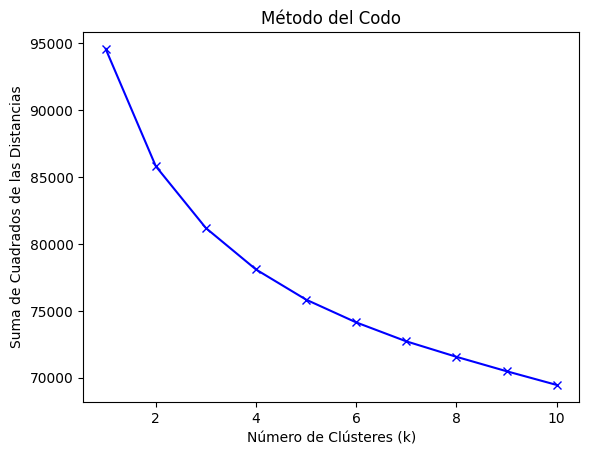

In [31]:
#K-means - número de clusters, método del codo
from sklearn.cluster import KMeans

ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(train)
    ssd.append(kmeans.inertia_)
plt.plot(range(1, 11), ssd, 'bx-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Cuadrados de las Distancias')
plt.title('Método del Codo')
plt.show()

A través del gráfico podemos ver que el punto de inflexión se encuentra en 3, aunque se podría valorar utilizar 4. Se pueden probar ambos y utilizar alguna métrica para valorar cuál es mejor.

###Parámetro n = 3

Vamos a ejecutar el algoritmo para número de clusters n = 3 y a visualizar el resultado.

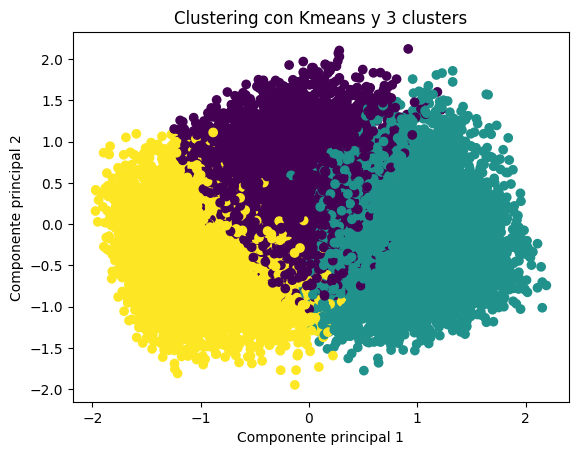

In [32]:
#K-Means n = 3
kmeans = KMeans(n_clusters=3, n_init=10, max_iter = 300, tol = 0.01)
kmeans.fit(train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train)
X_pca = np.hstack((X_pca, labels.reshape(-1, 1)))

#Visualizamos
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=X_pca[:, 2])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering con Kmeans y 3 clusters')
plt.show()

#----------
kmeans_n3 = kmeans

In [33]:
train_kmeans_n3 = original_train
train_kmeans_n3['etiquetas']= kmeans.labels_

####Validación

Para escoger un algoritmo se emplea el índice de Davies-Bouldin. Este índice mide el nivel de compactación de los clusters y el objetivo es minimizar su valor.

In [34]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(train, labels)
print("El índice de Davies-Bouldin es:", db_index)

El índice de Davies-Bouldin es: 3.1180968534624824


###Parámetro n = 4

Por completitud vamos a analizar el caso con número de clusters n = 2, puesto que en el método del codo también sale bien parado este valor. Es necesario hacer esta comparación para optimizar este hiperparámetro.

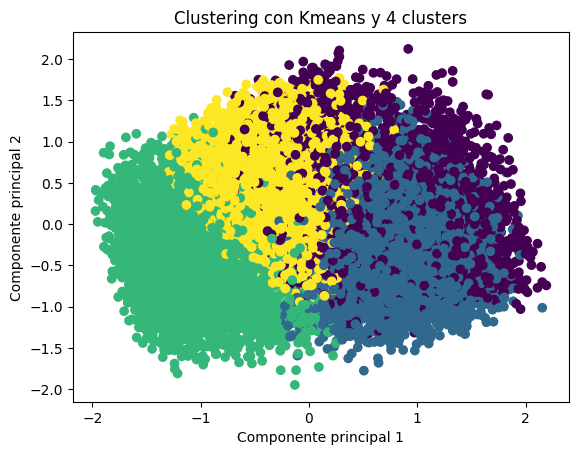

In [35]:
#K-Means n = 4
kmeans = KMeans(n_clusters=4, n_init=10, max_iter = 300, tol = 0.01)
kmeans.fit(train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train)
X_pca = np.hstack((X_pca, labels.reshape(-1, 1)))

#Visualizamos
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=X_pca[:, 2])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clustering con Kmeans y 4 clusters')
plt.show()

#-------------
kmeans_n4 = kmeans

Los clusters no están correctamente separados.

In [36]:
train_kmeans_n2 = original_train
train_kmeans_n2['etiquetas']= kmeans.labels_

####Validación

In [37]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(train, labels)
print("El índice de Davies-Bouldin es:", db_index)

El índice de Davies-Bouldin es: 2.976163927191953


El resultado es algo mejor que el anterior, parece que el mejor resultado lo sustenta n = 4.

##Análisis basado en densidad

En esta sección se emplea la alternativa a K-Means, pese a que fue el mejor resultado de la actividad anterior vamos a añadir variedad empleando DBSCAN. Es importante añadir variedad para aumentar las posibilidades de hallar el mejor resultado.

Text(0, 0.5, 'PC2')

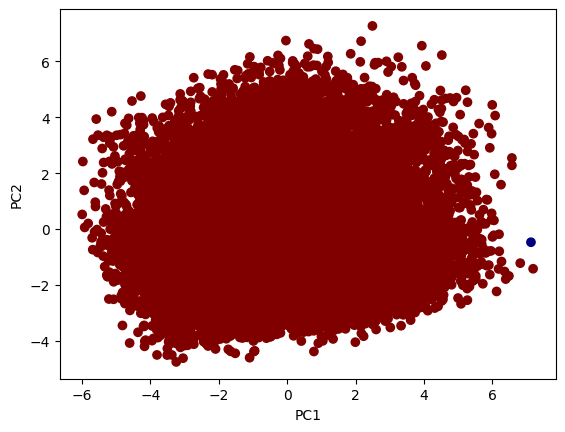

In [38]:
#DBSCAN

#PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X = scaler.fit_transform(train)

from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
components = PCA.fit_transform(X)

cumVar = pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"})

#---------------

#Algoritmo
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples = 3)
clusters = dbscan.fit_predict(components)
#plot the cluster assignments
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='jet')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [39]:
train_dbscan = original_train
train_dbscan['etiquetas'] = clusters

###Validación

In [40]:
#Índice Davies-Bouldin (DB)
from sklearn.metrics import davies_bouldin_score
score= davies_bouldin_score(components, clusters)
score

0.36253314257860375

Los resultados sugieren de forma clara que debemos abandonar la adición de etiquetas con estos métodos.

In [41]:
train = original_train

---
#Creación de distintos modelos
---

En esta sección crearemos varios modelos de aprendizaje supervisado para el resultado final. No tenemos a priori ninguna pista de cual es el mejor algoritmo por lo que probaremos varios de ellos.

Entrenaremos los modelos con los datos originales sin etiquetas de clusters, pues es el que mejor resultado ha dado.

##SVM

El primer modelo será basado en Máquinas de Vectores de Soporte (SVMs).

Predecir por separado es más flexible y permite que cada modelo se ajuste específicamente a cada etiqueta. Sin embargo, puede ser menos eficiente si las etiquetas están correlacionadas, como es nuestro caso.

MultiOutputRegressor permite predecir ambas etiquetas al mismo tiempo, lo que puede ser más eficiente si las etiquetas están correlacionadas. Sin embargo, todos los modelos subyacentes deben ser capaces de manejar múltiples salidas. Nosotros optamos por esta opción.

In [42]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn import svm

# Preparar los datos de entrenamiento
X_train = train.drop(["h1n1_vaccine", "seasonal_vaccine", "etiquetas"], axis=1)
Y_train = train[["h1n1_vaccine", "seasonal_vaccine"]]

# Crear un modelo SVM de multisalida
svm_model = svm.SVR()
multi_output_svm = MultiOutputRegressor(svm_model)

# Entrenar el modelo
multi_output_svm.fit(X_train, Y_train)

# Hacer predicciones
X_test = test
predicciones = multi_output_svm.predict(X_test)

# Si deseas obtener predicciones separadas
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('svm.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('svm.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.099843,0.100171
1,26708,0.099838,0.100018
2,26709,0.099853,0.100432
3,26710,0.099845,0.100345
4,26711,0.099845,0.100321


Resultado en la página web:

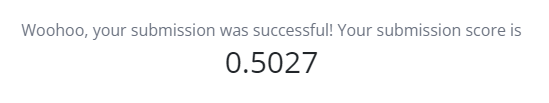

###validación

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score para h1n1_vaccine: 0.0000
Precisión para h1n1_vaccine: 0.0000
Recall para h1n1_vaccine: 0.0000
F1 Score para seasonal_vaccine: 0.0000
Precisión para seasonal_vaccine: 0.0000
Recall para seasonal_vaccine: 0.0000


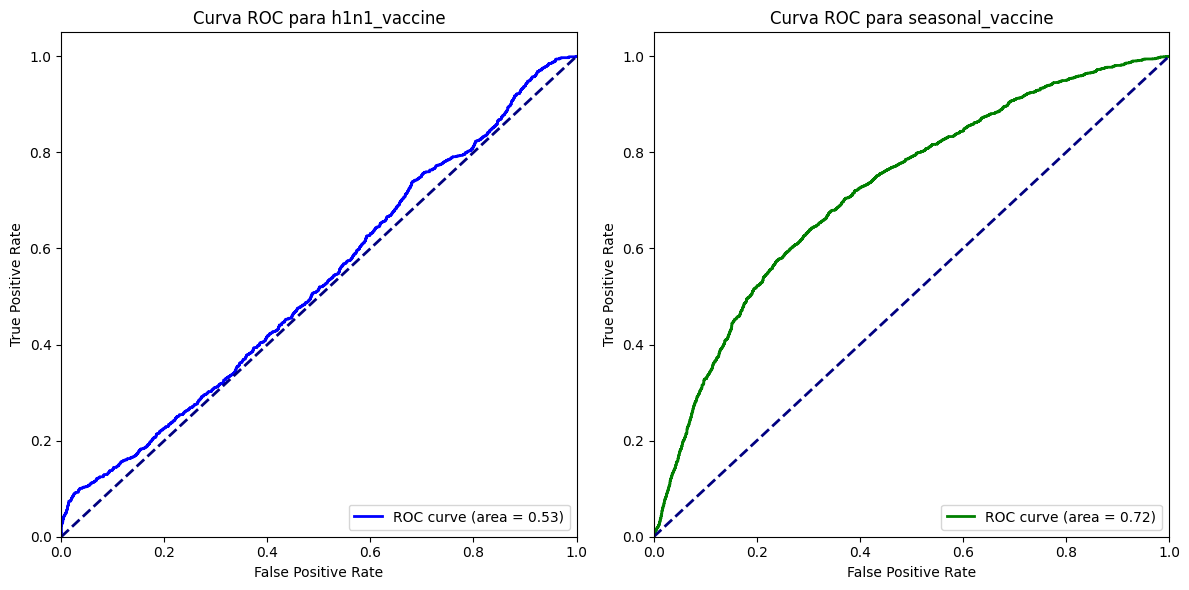

In [43]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = multi_output_svm.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Si las clases en el conjunto de datos están desbalanceadas, el modelo puede estar inclinado a predecir solo la clase mayoritaria (en este caso, quizás todos 0). Esto es común en problemas donde una clase es mucho más prevalente que la otra.

In [44]:
# Verificar la distribución de las clases
print(Y_train["h1n1_vaccine"].value_counts())
print(Y_train["seasonal_vaccine"].value_counts())

h1n1_vaccine
0    15753
1     4293
Name: count, dtype: int64
seasonal_vaccine
0    10651
1     9395
Name: count, dtype: int64


##KNN

El segundo modelo es el de K-Vecinos más cercanos. Probaremos con un valor de K = 5.

In [48]:
from sklearn.neighbors import KNeighborsRegressor

# Preparar los datos de entrenamiento
X_train = train.drop(["h1n1_vaccine", "seasonal_vaccine", "etiquetas"], axis=1)
Y_train = train[["h1n1_vaccine", "seasonal_vaccine"]]

# Crear un modelo KNN de multisalida
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
multi_output_knn = MultiOutputRegressor(knn_model)

# Entrenar el modelo
multi_output_knn.fit(X_train, Y_train)

# Asegurarse de que X_test tenga las mismas columnas que X_train
X_test = test[X_train.columns]

# Hacer predicciones
predicciones = multi_output_knn.predict(X_test)

# Si deseas obtener predicciones separadas
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('knn.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('knn.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.0,0.2
1,26708,0.0,0.2
2,26709,0.2,0.6
3,26710,0.0,0.4
4,26711,0.2,0.4


Resultado en la página web:

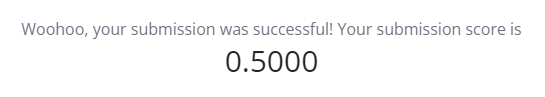

###Validación

F1 Score para h1n1_vaccine: 0.1136
Precisión para h1n1_vaccine: 0.2557
Recall para h1n1_vaccine: 0.0730
F1 Score para seasonal_vaccine: 0.5047
Precisión para seasonal_vaccine: 0.5172
Recall para seasonal_vaccine: 0.4929


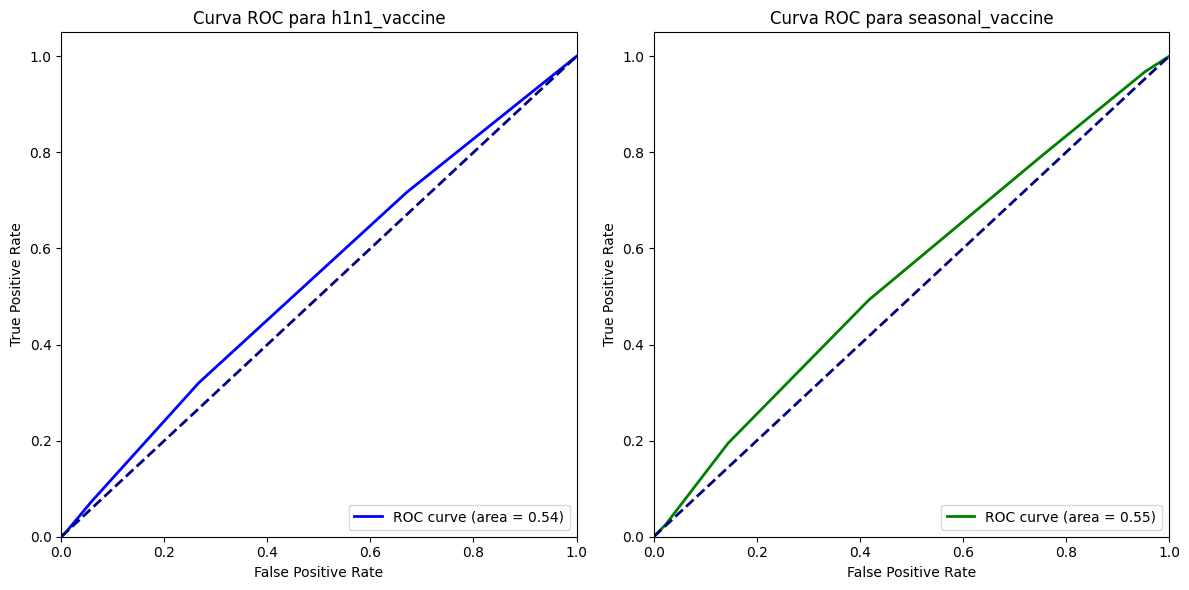

In [49]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = multi_output_knn.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##Random Forest

A continuación entrenamos un modelo de random forest.

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Preparar los datos de entrenamiento
X_train = train.drop(["h1n1_vaccine", "seasonal_vaccine", "etiquetas"], axis=1)
Y_train = train[["h1n1_vaccine", "seasonal_vaccine"]]

# Crear un modelo Random Forest de multisalida
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators según sea necesario
multi_output_rf = MultiOutputRegressor(rf_model)

# Entrenar el modelo
multi_output_rf.fit(X_train, Y_train)

# Asegurarse de que X_test tenga las mismas columnas que X_train
X_test = test[X_train.columns]

# Hacer predicciones
predicciones = multi_output_rf.predict(X_test)

# Si deseas obtener predicciones separadas
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('randomforest.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('randomforest.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.15,0.20
1,26708,0.06,0.03
2,26709,0.36,0.78
3,26710,0.27,0.66
4,26711,0.50,0.52


Resultado en la página web:

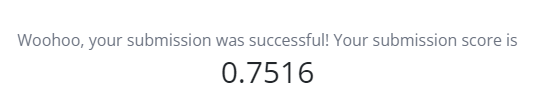

###Validación

F1 Score para h1n1_vaccine: 0.5256
Precisión para h1n1_vaccine: 0.6486
Recall para h1n1_vaccine: 0.4418
F1 Score para seasonal_vaccine: 0.7444
Precisión para seasonal_vaccine: 0.7537
Recall para seasonal_vaccine: 0.7353


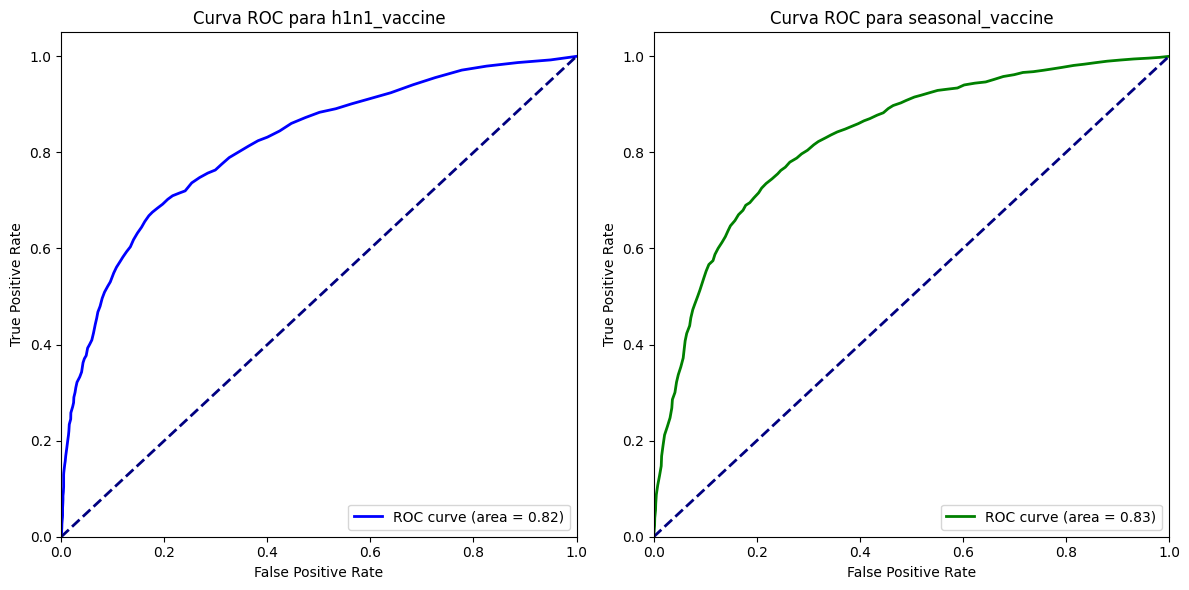

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = multi_output_rf.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##Regresión lineal

Finalmente entrenamos un modelo de Regresión lineal.

In [52]:
from sklearn.linear_model import LinearRegression

# Preparar los datos de entrenamiento
X_train = train.drop(["h1n1_vaccine", "seasonal_vaccine", "etiquetas"], axis=1)
Y_train = train[["h1n1_vaccine", "seasonal_vaccine"]]

# Crear un modelo de Regresión Lineal de multisalida
linear_model = LinearRegression()
multi_output_linear = MultiOutputRegressor(linear_model)

# Entrenar el modelo
multi_output_linear.fit(X_train, Y_train)

# Asegurarse de que X_test tenga las mismas columnas que X_train
X_test = test[X_train.columns]

# Hacer predicciones
predicciones = multi_output_linear.predict(X_test)

# Si deseas obtener predicciones separadas
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('linearreg.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('linearreg.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.088026,0.272975
1,26708,0.003934,-0.012181
2,26709,0.389181,0.631028
3,26710,0.155018,0.850833
4,26711,0.580504,0.459277


Resultado en la página web:

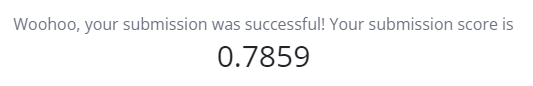

###Validación

F1 Score para h1n1_vaccine: 0.5056
Precisión para h1n1_vaccine: 0.6947
Recall para h1n1_vaccine: 0.3974
F1 Score para seasonal_vaccine: 0.7429
Precisión para seasonal_vaccine: 0.7680
Recall para seasonal_vaccine: 0.7194


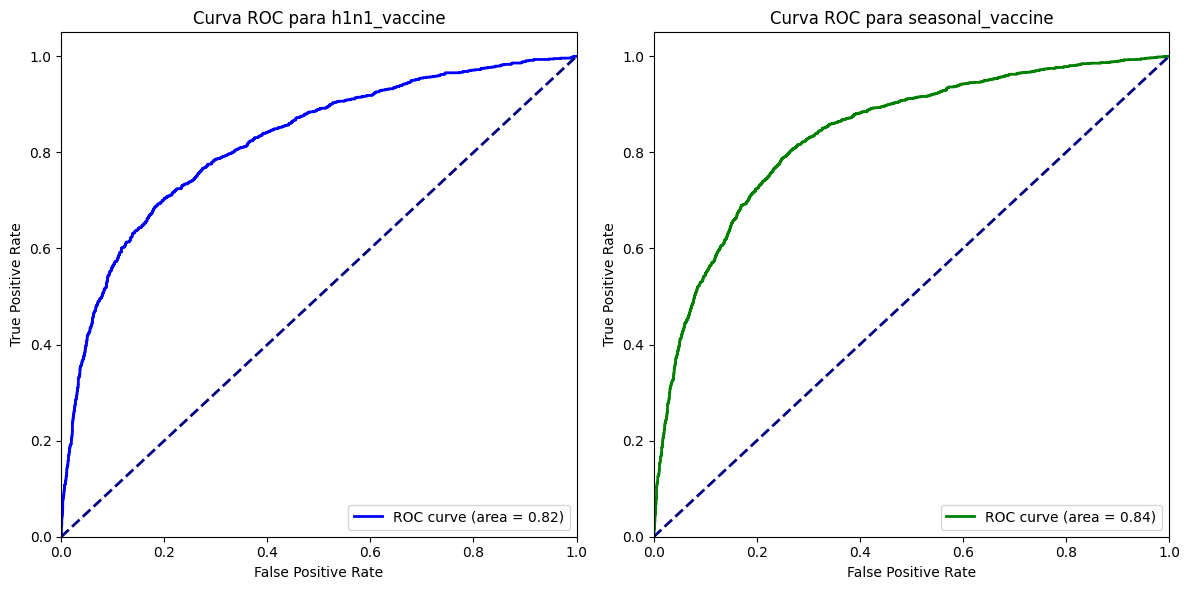

In [53]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = multi_output_linear.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

---
# Optimización
---

Optimizamos mediante varios métodos el modelo de regresión lineal, el que mejores resultados dió en la web de Driven Data.

##Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir el pipeline con un scaler y el modelo Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización
    ('ridge', Ridge())
])

# Definir los hiperparámetros que quieres ajustar
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0],
    'ridge__fit_intercept': [True, False],
    # 'ridge__normalize': [True, False] -> Este ya no es necesario y no se incluye.
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Hacer predicciones con el mejor modelo
best_model_grid = grid_search.best_estimator_
predicciones = best_model_grid.predict(X_test)

# Separar las predicciones
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

# Verifica las primeras predicciones
print("Predicciones para h1n1_vaccine:", pred_h1n1[:5])
print("Predicciones para seasonal_vaccine:", pred_seasonal[:5])

Mejores hiperparámetros: {'ridge__alpha': 0.1, 'ridge__fit_intercept': True}
Predicciones para h1n1_vaccine: [0.08802639 0.00393437 0.3891802  0.15501912 0.58050191]
Predicciones para seasonal_vaccine: [ 0.27297492 -0.01218028  0.63102841  0.85083086  0.45927796]


In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('lr-gs.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('lr-gs.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.088026,0.272975
1,26708,0.003934,-0.012180
2,26709,0.389180,0.631028
3,26710,0.155019,0.850831
4,26711,0.580502,0.459278


Resultado de la web:

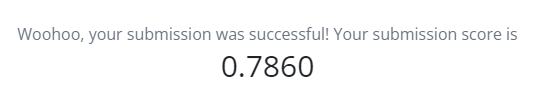

###Validación

F1 Score para h1n1_vaccine: 0.5056
Precisión para h1n1_vaccine: 0.6947
Recall para h1n1_vaccine: 0.3974
F1 Score para seasonal_vaccine: 0.7429
Precisión para seasonal_vaccine: 0.7680
Recall para seasonal_vaccine: 0.7194


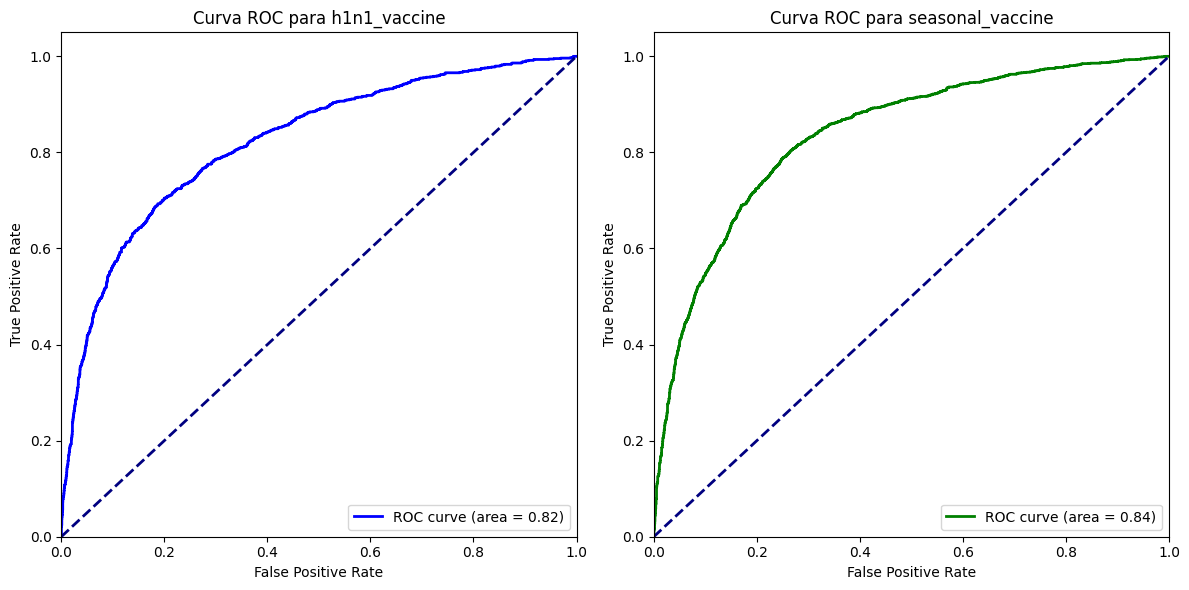

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = best_model_grid.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##Random Search

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats

# Definir el pipeline con un scaler y el modelo Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización
    ('ridge', Ridge())
])

# Definir la distribución de los hiperparámetros que quieres ajustar
param_dist = {
    'ridge__alpha': stats.expon(scale=1.0),  # Distribución exponencial para alpha
    'ridge__fit_intercept': [True, False],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)

# Entrenar el modelo usando RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

# Hacer predicciones con el mejor modelo
best_model_random = random_search.best_estimator_
predicciones = best_model_random.predict(X_test)

# Separar las predicciones
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

# Verifica las primeras predicciones
print("Predicciones para h1n1_vaccine:", pred_h1n1[:5])
print("Predicciones para seasonal_vaccine:", pred_seasonal[:5])

Mejores hiperparámetros: {'ridge__alpha': 0.005537420375935475, 'ridge__fit_intercept': True}
Predicciones para h1n1_vaccine: [0.08802601 0.00393395 0.38918059 0.15501792 0.58050387]
Predicciones para seasonal_vaccine: [ 0.27297455 -0.0121809   0.63102817  0.85083294  0.4592768 ]


In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('lr-rs.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('lr-rs.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.088026,0.272975
1,26708,0.003934,-0.012181
2,26709,0.389181,0.631028
3,26710,0.155018,0.850833
4,26711,0.580504,0.459277


Resultado en la web:

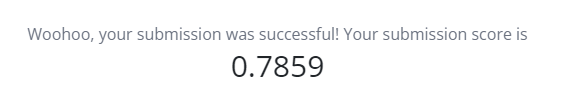

###Validación

F1 Score para h1n1_vaccine: 0.5056
Precisión para h1n1_vaccine: 0.6947
Recall para h1n1_vaccine: 0.3974
F1 Score para seasonal_vaccine: 0.7429
Precisión para seasonal_vaccine: 0.7680
Recall para seasonal_vaccine: 0.7194


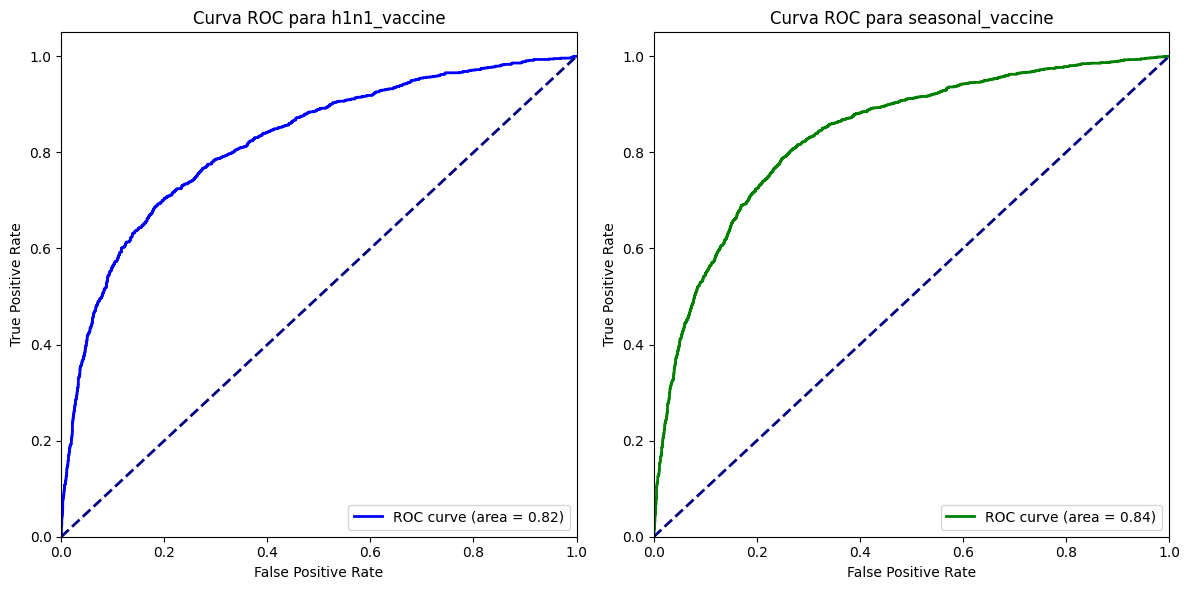

In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = best_model_random.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

##Optimización Bayesiana

In [59]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00


In [60]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

# Definir la función objetivo para Optuna
def objective(trial):
    # Definir el pipeline con un scaler y el modelo Ridge
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    ridge_model = Ridge(alpha=alpha, fit_intercept=fit_intercept)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalización
        ('ridge', MultiOutputRegressor(ridge_model))
    ])

    # Realizar validación cruzada
    scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
    return np.mean(scores)

# Crear un sampler con una semilla para la reproducibilidad
sampler = optuna.samplers.TPESampler(seed=42)

# Crear un estudio de optimización con el sampler
study = optuna.create_study(direction='maximize', sampler=sampler)  # Maximizar el valor negativo para minimizar el MAE
study.optimize(objective, n_trials=100)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)

# Entrenar el modelo con los mejores hiperparámetros encontrados
best_alpha = study.best_params['alpha']
best_fit_intercept = study.best_params['fit_intercept']

ridge_model = Ridge(alpha=best_alpha, fit_intercept=best_fit_intercept)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización
    ('ridge', MultiOutputRegressor(ridge_model))
])

pipeline.fit(X_train, Y_train)

# Hacer predicciones
predicciones = pipeline.predict(X_test)

# Si deseas obtener predicciones separadas
pred_h1n1 = predicciones[:, 0]
pred_seasonal = predicciones[:, 1]

# Verifica las primeras predicciones
print("Predicciones para h1n1_vaccine:", pred_h1n1[:5])
print("Predicciones para seasonal_vaccine:", pred_seasonal[:5])

[I 2024-08-17 21:09:24,213] A new study created in memory with name: no-name-657b4831-953d-4906-b452-ea0a9ae563d4
[I 2024-08-17 21:09:25,196] Trial 0 finished with value: -0.3011003838758778 and parameters: {'alpha': 0.017670169402947963, 'fit_intercept': True}. Best is trial 0 with value: -0.3011003838758778.
[I 2024-08-17 21:09:25,981] Trial 1 finished with value: -0.30110123480273077 and parameters: {'alpha': 0.39079671568228835, 'fit_intercept': True}. Best is trial 0 with value: -0.3011003838758778.
[I 2024-08-17 21:09:26,622] Trial 2 finished with value: -0.301100344088618 and parameters: {'alpha': 0.00022310108018679258, 'fit_intercept': True}. Best is trial 2 with value: -0.301100344088618.
[I 2024-08-17 21:09:27,136] Trial 3 finished with value: -0.39690949300422934 and parameters: {'alpha': 1.7718847354806828, 'fit_intercept': False}. Best is trial 2 with value: -0.301100344088618.
[I 2024-08-17 21:09:27,531] Trial 4 finished with value: -0.3011229057104141 and parameters: {'

Mejores hiperparámetros: {'alpha': 0.00010034426392908844, 'fit_intercept': True}
Predicciones para h1n1_vaccine: [0.08802599 0.00393392 0.38918062 0.15501786 0.58050398]
Predicciones para seasonal_vaccine: [ 0.27297453 -0.01218093  0.63102815  0.85083306  0.45927673]


In [ ]:
#Generar output
output = pd.DataFrame({ 'respondent_id': test['respondent_id'], 'h1n1_vaccine': pred_h1n1, 'seasonal_vaccine': pred_seasonal})

from google.colab import files

with open('lr-bo.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('lr-bo.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.088026,0.272975
1,26708,0.003934,-0.012181
2,26709,0.389181,0.631028
3,26710,0.155018,0.850833
4,26711,0.580504,0.459277


Resultado en la web:

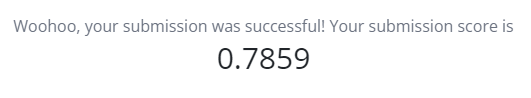

###Validación

F1 Score para h1n1_vaccine: 0.5056
Precisión para h1n1_vaccine: 0.6947
Recall para h1n1_vaccine: 0.3974
F1 Score para seasonal_vaccine: 0.7429
Precisión para seasonal_vaccine: 0.7680
Recall para seasonal_vaccine: 0.7194


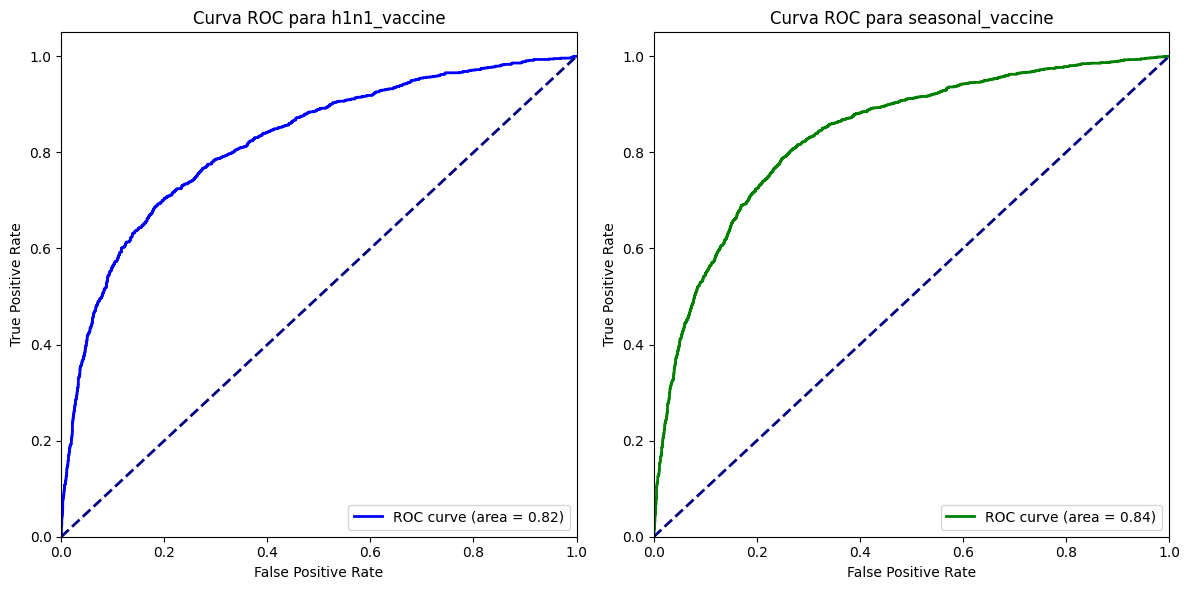

In [61]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Preparar los datos de validación
X_val = validation.drop(["h1n1_vaccine", "seasonal_vaccine"], axis=1)
Y_val = validation[["h1n1_vaccine", "seasonal_vaccine"]]

# Hacer predicciones en el conjunto de validación
pred_val = pipeline.predict(X_val)

# Convertir las predicciones a etiquetas binarias usando un umbral de 0.5
pred_h1n1_bin = (pred_val[:, 0] >= 0.5).astype(int)
pred_seasonal_bin = (pred_val[:, 1] >= 0.5).astype(int)

# Calcular el F1 score, precisión y recall para cada vacuna
f1_h1n1 = f1_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
precision_h1n1 = precision_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)
recall_h1n1 = recall_score(Y_val["h1n1_vaccine"], pred_h1n1_bin)

f1_seasonal = f1_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
precision_seasonal = precision_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)
recall_seasonal = recall_score(Y_val["seasonal_vaccine"], pred_seasonal_bin)

# Imprimir los resultados
print(f"F1 Score para h1n1_vaccine: {f1_h1n1:.4f}")
print(f"Precisión para h1n1_vaccine: {precision_h1n1:.4f}")
print(f"Recall para h1n1_vaccine: {recall_h1n1:.4f}")

print(f"F1 Score para seasonal_vaccine: {f1_seasonal:.4f}")
print(f"Precisión para seasonal_vaccine: {precision_seasonal:.4f}")
print(f"Recall para seasonal_vaccine: {recall_seasonal:.4f}")

# Calcular las curvas ROC y AUC para ambas vacunas
fpr_h1n1, tpr_h1n1, _ = roc_curve(Y_val["h1n1_vaccine"], pred_val[:, 0])
roc_auc_h1n1 = roc_auc_score(Y_val["h1n1_vaccine"], pred_val[:, 0])

fpr_seasonal, tpr_seasonal, _ = roc_curve(Y_val["seasonal_vaccine"], pred_val[:, 1])
roc_auc_seasonal = roc_auc_score(Y_val["seasonal_vaccine"], pred_val[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(12, 6))

# Curva ROC para h1n1_vaccine
plt.subplot(1, 2, 1)
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para h1n1_vaccine')
plt.legend(loc="lower right")

# Curva ROC para seasonal_vaccine
plt.subplot(1, 2, 2)
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label=f'ROC curve (area = {roc_auc_seasonal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para seasonal_vaccine')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#Resultados


Se muestra una tabla de comparación de resultados basándonos en la evaluación del sitio web de driven data

| Modelo | Score (Driven Data) | Algoritmo | Hiperparámetros** |
| --- | --- | --- | ---
| multi_output_svm | 0.5027 | SVM | estimator = SVR, n_jobs = None, kernel = rbf, degree = 3, gamma = scale, coef0 = 0.0, C = 1.0, epsilon = 0.1, shrinking = True, tol = 1e-3, max_iter = -1
| knn_model | 0.5000 | KNN | n_neighbors=**5**
| rf_model | 0.7516 | Random Forest | n_estimators = 100, random_state = 42
| linear_model | 0.7859 | Regresión Lineal | fit_intercept = True, copy_X = True, n_jobs = None
| best_model_grid | 0.7860 | Grid Search - Regresión Lineal | alpha = 0.1, intercept = True
| best_model_random  | 0.7859 | Random Search - Regresión Lineal | alpha = 0.005537420375935475, fit_intercept = True
| ridge_model | 0.7859 | Optimización Bayesiana - Regresión Lineal | alpha = 0.00010034426392908844, fit_intercept = True

** Los hiperparámetros de los modelos multi_output_svm y linear_model son los que vienen por defecto con la biblioteca sklearn.

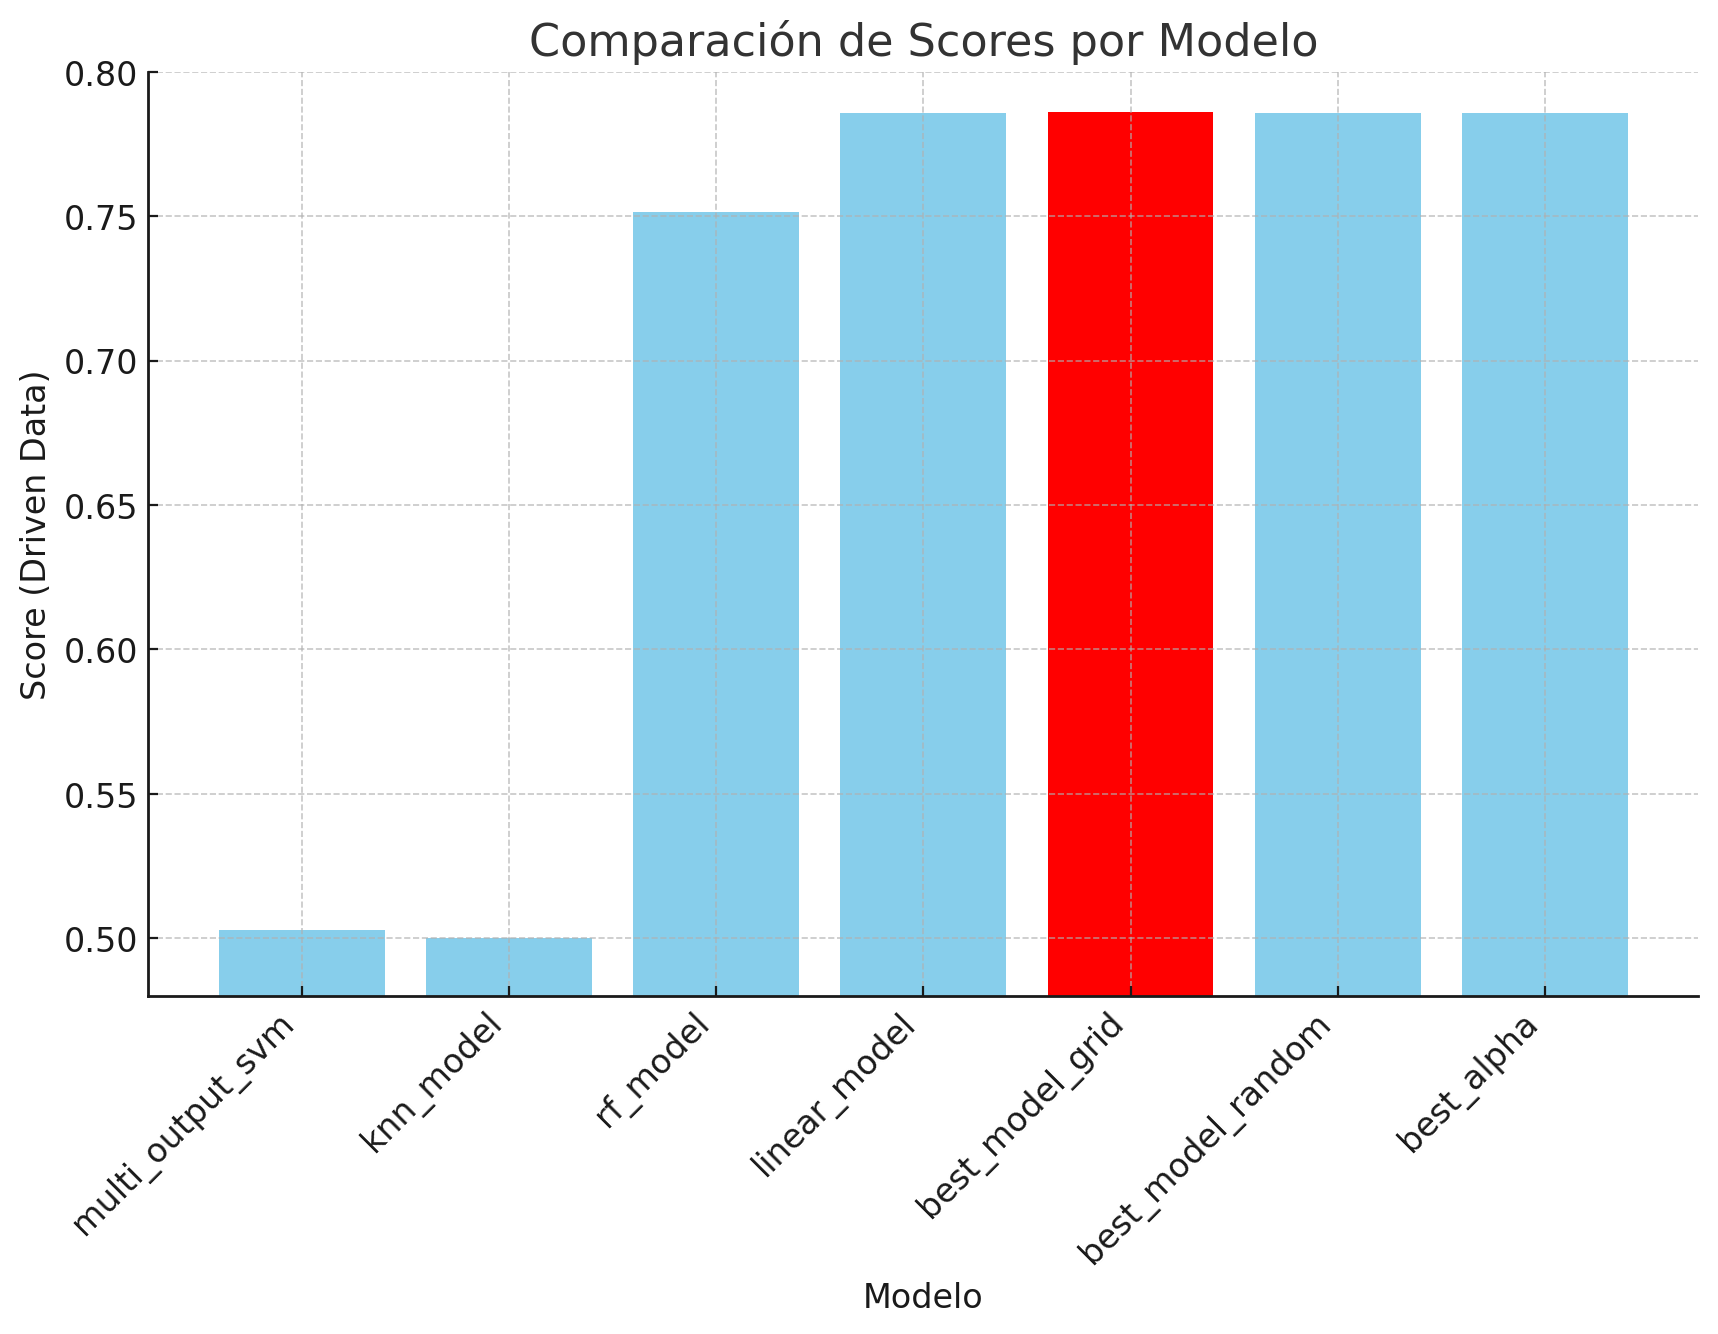

A continuación se muestra una nueva tabla con los resultados de cada modelo respecto del conjunto de validación.

| Modelo             | F1 Score H1N1 | Precisión H1N1 | Recall H1N1 | AUC H1N1 | F1 Score Seasonal | Precisión Seasonal | Recall Seasonal | AUC Seasonal |
| ------------------ | -------------- | -------------- | ----------- | -------- | ----------------- | ------------------ | ---------------- | ------------ |
| multi_output_svm   | 0.0000         | 0.0000         | 0.0000      | 0.53     | 0.0000            | 0.0000             | 0.0000           | 0.72         |
| knn_model          | 0.1136         | 0.2557         | 0.0730      | 0.54     | 0.5047            | 0.5172             | 0.4929           | 0.55         |
| rf_model           | 0.5256         | 0.6486         | 0.4418      | 0.82     | 0.7444            | 0.7537             | 0.7353           | 0.83         |
| linear_model       | 0.5056         | 0.6947         | 0.3974      | 0.82     | 0.7429            | 0.7680             | 0.7194           | 0.84         |
| best_model_grid    | 0.5056         | 0.6947         | 0.3974      | 0.82     | 0.7429            | 0.7680             | 0.7194           | 0.84         |
| best_model_random  | 0.5056         | 0.6947         | 0.3974      | 0.82     | 0.7429            | 0.7680             | 0.7194           | 0.84         |
| ridge_model        | 0.5056         | 0.6947         | 0.3974      | 0.82     | 0.7429            | 0.7680             | 0.7194           | 0.84         |


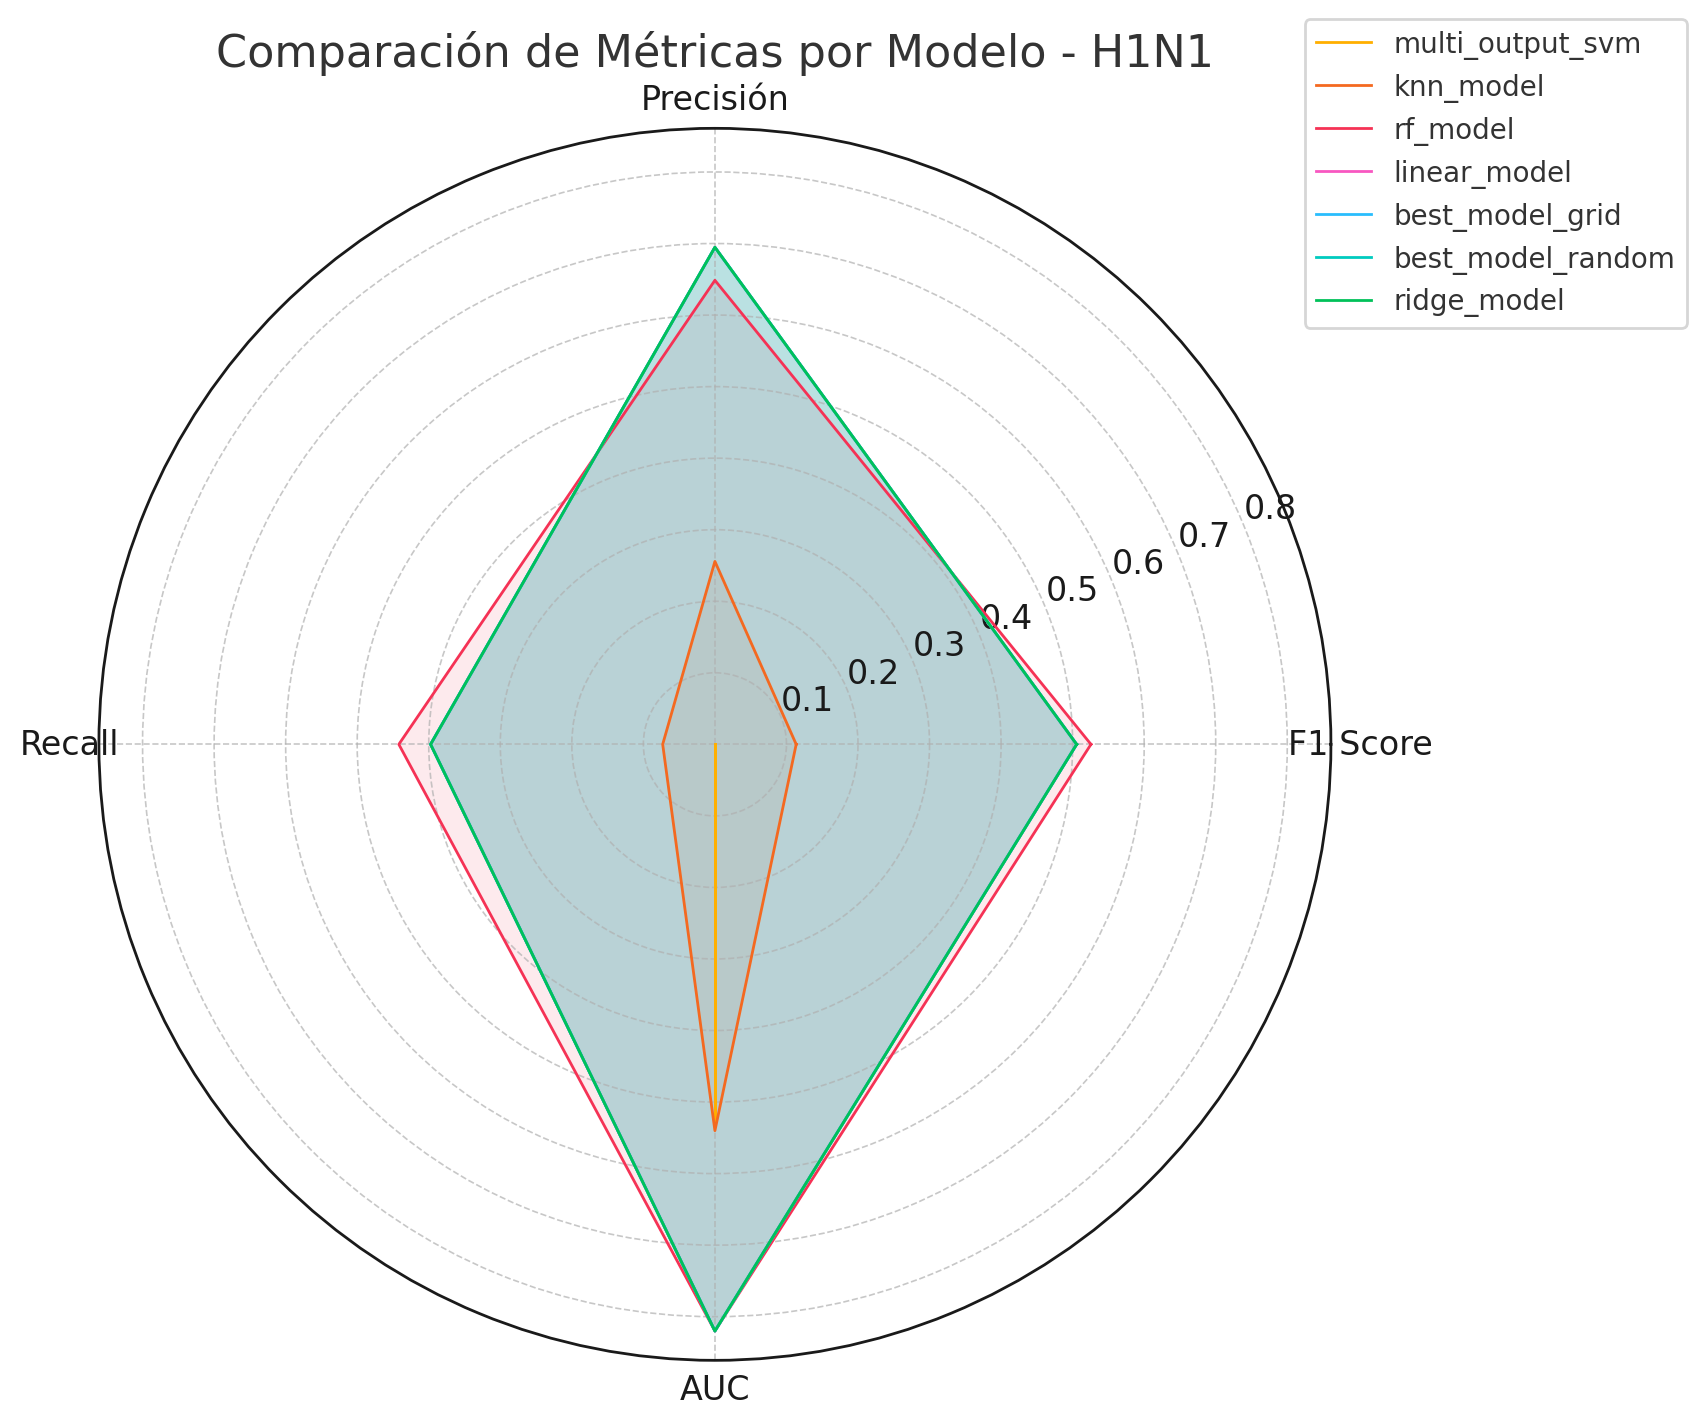

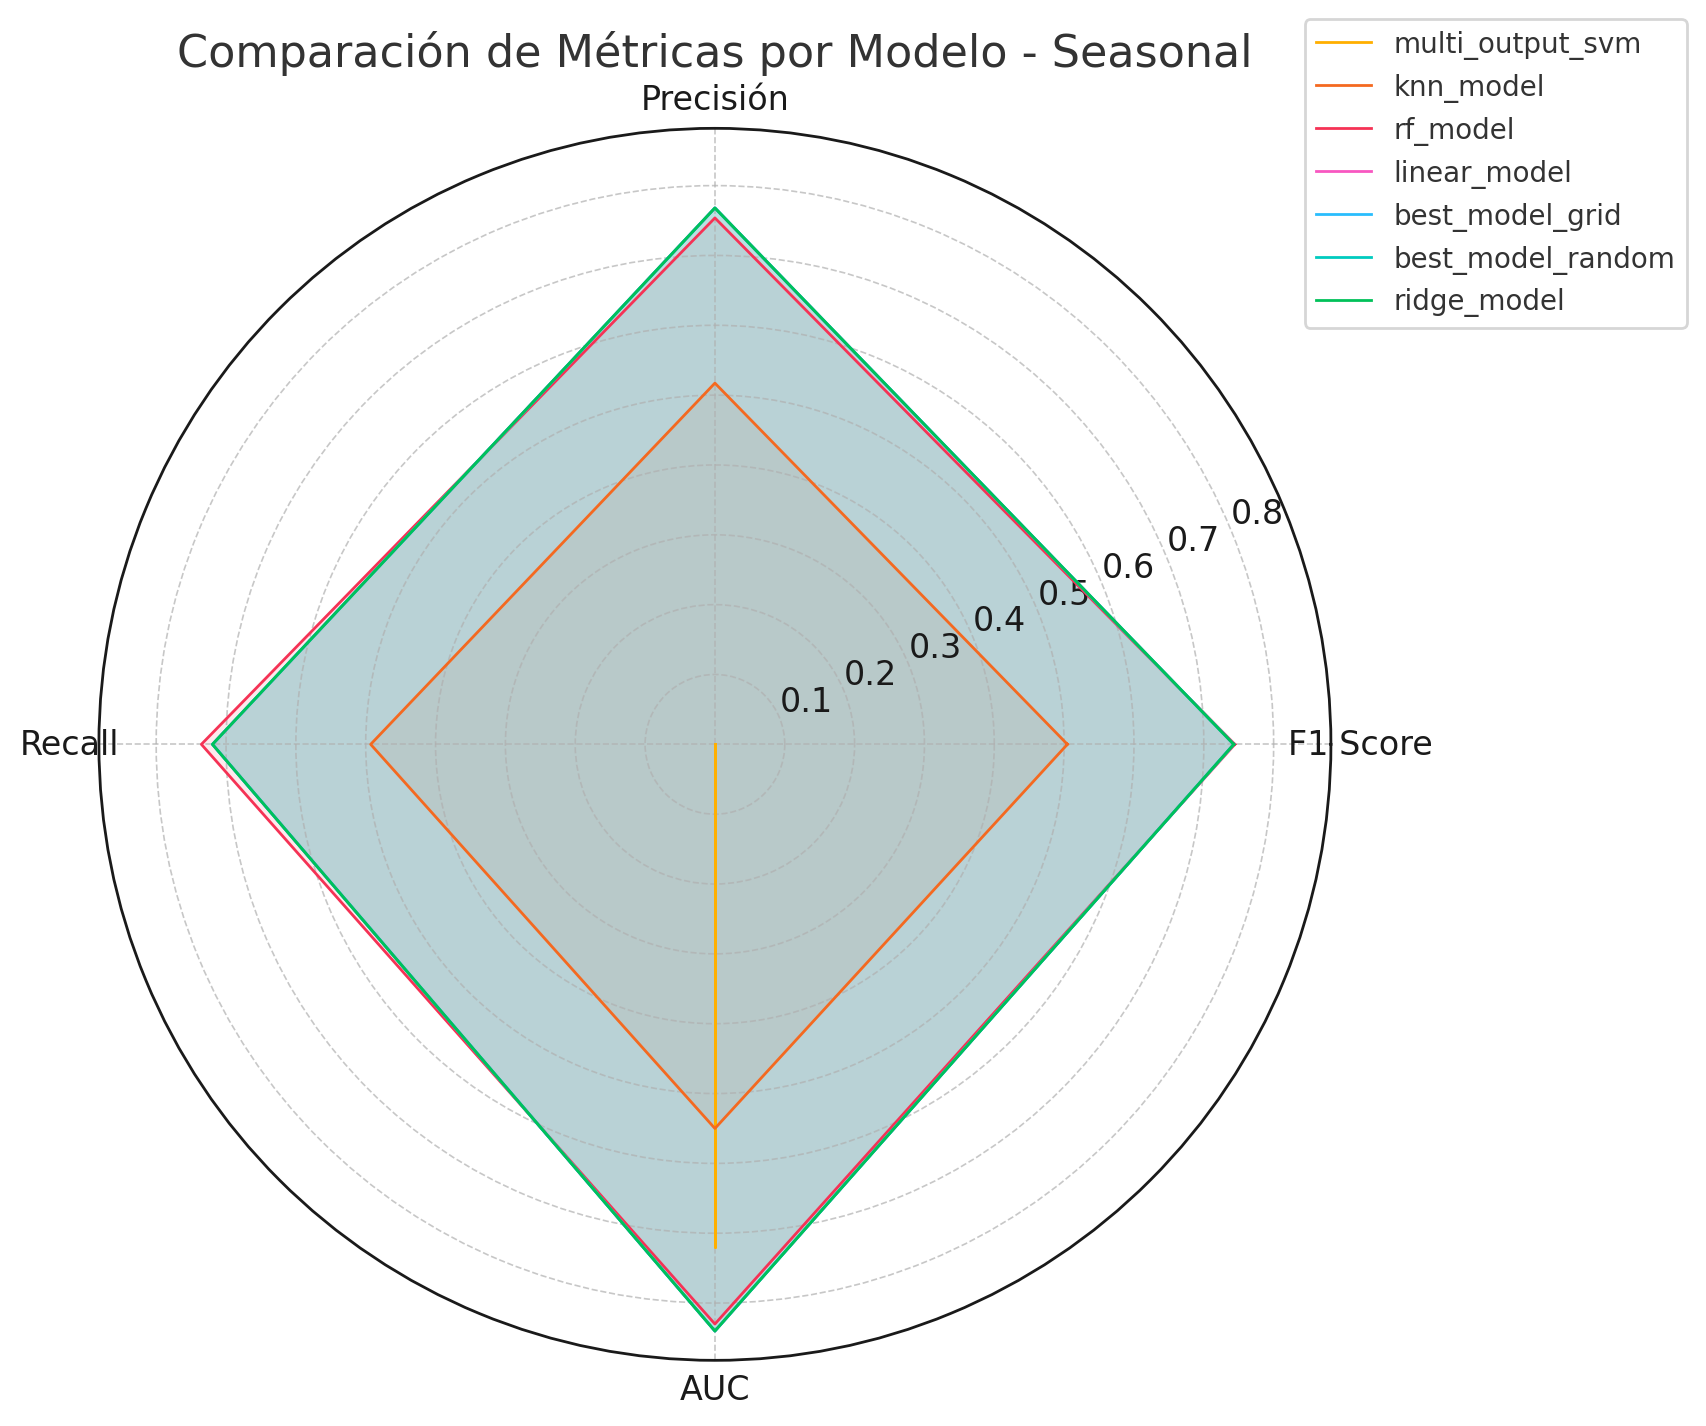

Los modelos ridge_model y rf_model son superiores en cuanto a la evaluación del conjunto de validación, esto contrasta con la evaluación de la web DrivenData, que da un Score superior al modelo best_model_grid.

---
#Resumen final y conclusiones
---

Las características finales de los modelos son los siguientes:

* income_poverty_num             
* education_num                  
* employment_status_num          
* h1n1_knowledge                 
* household_adults               
* children_per_adult             
* household_size                 
* health_worker                  
* sex_bin                                      
* census_msa_num                 
* opinion_h1n1_vacc_effective                      
* household_children             
* opinion_seas_vacc_effective    
* behavioral_avoidance           
* doctor_recc_h1n1               
* behavioral_wash_hands          
* doctor_recc_seasonal          
* respondent_id                 
* child_under_6_months          
* opinion_seas_risk             
* opinion_h1n1_risk             
* hhs_geo_region_num            
* age_group_num                 
* behavioral_touch_face         
* h1n1_concern                  
* behavioral_face_mask          
* behavioral_antiviral_meds     
* opinion_h1n1_sick_from_vacc   
* chronic_med_condition         
* opinion_seas_sick_from_vacc   
* precaution_level              
* race_num                      
* behavioral_large_gatherings   
* behavioral_outside_home       
* employment_occupation_num     
* employment_industry_num      
* rent_or_own_bin               
* marital_status_bin      

El mejor modelo es por tanto best_model_grid puesto que obtiene el mejor resultdo en la validación de Score de la página web de DrivenData.

Al poder contar con varios algoritmos de aprendizaje supervisado, como lo son SVM, KNN, el Random Forest o la Regrsión Lineal hemos sido capaces de identificar cuál genera mejor resultado y proceder a optimizarlo.

Lo mismo ha sucedido con los algoritmos de agrupamiento que utilizamos en la actividad anterior. Se ha comprobado que K Means y DBScan no aportaban información útil mediante los agrupamientos.

Cabe señalar que la evaluaciones de Score en el conjunto de validación no se corresponde con la de la web, sino que es en general superior, esto es curioso dado que los datos del conjunto de validación no alimentan los modelos y no debería de haber overfitting.

Sin embargo, a la vista de los resultados, queda claro que se ha incurrido en alguna clase de sesgo durante la elaboración de los modelos, tal vez algún overfitting que no somos capaces de detectar.

Cabe también mencionar que la optimización de hiperparámetros mediante varias técnicas no afecta nada en absoluto a los resultados de Score. Esto puede ser porque existe una tendencia muy marcada a alcanzar ese resultado que no puede ser modificada por estos parámetros.

El resultado final de Score = 0.7860 de DrivenData se considera exitoso pero con amplio margend e mejora. Cabe resaltar el cambio de 0.5000 obtenido con el primer modelo sin optimizar respecto del mejor modelo, ya trabajado y optimizado.

Es posible que se pudiera haber mejorado aún más mediante nuevas selecciones de características distintas a la realizada, sin embargo, la limitación de intentos en la página web ha sido un escollo en este aspecto, puesto que hay una limitación de tres intentos al día.

Como conclusión general, hemos desarrollado modelos predictivos para la vacunación contra el H1N1 y la gripe estacional. Aunque los modelos lograron un rendimiento razonable, hay espacio para mejoras. Por ejemplo, se podría explorar la recolección de datos adicionales o la inclusión de características más avanzadas que capturen mejor la variabilidad de los datos.

---
#Trabajo Futuro
---

Se podría ahondar mucho más en la selección de características ahora que se tiene un buen algoritmo de regresión optimizado.

Con una cantidad suficiente de pruebas y ensayos con diferentes colecciones de características se alcanzaría un Score superior.

Se deja como trabajo futuro:
1. Explorar modelos más avanzados como XGBoost o redes neuronales.
2. Realizar una búsqueda de hiperparámetros más exhaustiva utilizando GridSearchCV.
3. Evaluar la posibilidad de combinar varios modelos en un ensamble para mejorar el rendimiento.
4. Explorar selección de características.